In [2]:
import seaborn as sns
import pandas as pd
import numpy as np

In [3]:
import conceptnet_lite

conceptnet_lite.connect("data/conceptnet.db")
from conceptnet_lite import Label, edges_for

In [4]:
import mutual_info as mi
#from mutual_info import *
#len(mi.nearest_distances(texto1.T,k=3))


In [132]:
def encontrar_relaciones(relaciones):
    borrar=set()
    borrar_i=set()
    for r in relaciones:
        index=r[0]
        c=r[1]
        wt=str(index).split("{")[1].split(",")[0]
        wh=str(c).split("{")[1].split(",")[0]    
        try:
            for e in edges_for(Label.get(text=wh, language='en').concepts, same_language=True):
                if "synonym"==e.relation.name:
                    if wh== e.start.text:
                        if e.end.text==wt:
                            borrar.add(c)
                            borrar_i.add(index)
                            break
                    else:
                        if e.start.text==wt:
                            borrar.add(c)
                            borrar_i.add(index)
                            break
                elif "is_a" ==e.relation.name:
                    if wh== e.start.text:
                        if e.end.text==wt:
                            print(wh," is_a ",wt)
                            borrar.add(c)
                            borrar_i.add(index)
                            break
                    else: ##quitar y la busqueda de relacioens
                        if e.start.text==wt:
                            print(wt," is_a ",wh)
                            borrar.add(c)
                            borrar_i.add(index)
                            break
                elif "derived_from" == e.relation.name:
                    if wh== e.start.text:
                        if e.end.text==wt:
                            print(wh," derivado_from ",wt)
                            borrar.add(c)
                            borrar_i.add(index)
                            break
                elif "used_for" == e.relation.name:
                    if wh== e.start.text:
                        if e.end.text==wt:
                            print(wh," used_for ",wt)
                            borrar.add(c)
                            borrar_i.add(index)
                            break
        except:
            a=0
    return list(borrar),list(borrar_i)

In [109]:
def encontrar_relaciones_contrarias(relaciones):
    antonyms=[]
    for r in relaciones:
        index=r[0]
        c=r[1]
        wt=str(index).split("{")[1].split(",")[0]
        wh=str(c).split("{")[1].split(",")[0]
        try:
            for e in edges_for(Label.get(text=wh, language='en').concepts, same_language=True):
                if "antonym" ==e.relation.name:
                    if wt== e.start.text:
                        if e.end.text==wh:
                            print(wt," antonym ",wh)
                            #borrar.append(c)
                            #borrar_i.append(index)
                            antonyms.append(wt)
                            break
                        else:
                            print(wh," antonym ",wt)
                            #borrar.append(c)
                            #borrar_i.append(index)
                            antonyms.append(wt)
                            break
                elif "distinct_from" ==e.relation.name:
                    if wh== e.start.text:
                        if e.end.text==wt:
                            print(wh," distinct from ",wt)
                            #borrar.append(c)
                            #borrar_i.append(index)
                            antonyms.append(wt)
                            break
                    else:
                        if e.start.text==wt:
                            print(wt," antonym ",wh)
                            #borrar.append(c)
                            #borrar_i.append(index)
                            antonyms.append(wt)
                            break
        except:
            a=0
    return antonyms

In [111]:
def encontrar_relaciones_cercanas(relaciones):
    related=[]
    for r in relaciones:
        index=r[0]
        c=r[1]
        wt=str(index).split("{")[1].split(",")[0]
        wh=str(c).split("{")[1].split(",")[0]
        try:
            for e in edges_for(Label.get(text=wh, language='en').concepts, same_language=True):
                if "related_to" ==e.relation.name:
                    if wt== e.start.text:
                        if e.end.text==wh:
                            print(wt," related_to ",wh)
                            #borrar.append(c)
                            #borrar_i.append(index)
                            related.append(wt)
                            break
                        else:
                            print(wh," related_to ",wt)
                            #borrar.append(c)
                            #borrar_i.append(index)
                            related.append(wt)
                            break
                elif "similar_to" ==e.relation.name:
                    if wh== e.start.text:
                        if e.end.text==wt:
                            print(wh," similar_to ",wt)
                            #borrar.append(c)
                            #borrar_i.append(index)
                            related.append(wt)
                            break
                    else:
                        if e.start.text==wt:
                            print(wt," similar_to ",wh)
                            #borrar.append(c)
                            #borrar_i.append(index)
                            related.append(wt)
                            break
        except:
            a=0
    return related

In [6]:
dfp=pd.read_pickle("data/prueba2_T.pickle")
dfp

,Main index,Text,Hipotesis,R_Text,R_Hip,M_Align,Prediction,Gold_label,Input1,Input2,Model1,Model2
0,0,"[NULL{null,PROPN}, a{a,DET}, man{man,NOUN}, we...","[NULL{null,PROPN}, a{a,DET}, person{person,NOU...","[[0.46309, 0.43844, -0.47275, 0.0077819, 0.404...","[[0.46309, 0.43844, -0.47275, 0.0077819, 0.404...","[[54.419086, 0.26434264, 19.101225, 1.2564747,...","[0.03256245, 0.9674213, 1.6298849e-05]","[1.0, 0.0, 0.0]","[[0.46309, 0.43844, -0.47275, 0.0077819, 0.404...","[[0.46309, 0.43844, -0.47275, 0.0077819, 0.404...","[[0.46309, 0.43844, -0.47275, 0.0077819, 0.404...","[[0.46309, 0.43844, -0.47275, 0.0077819, 0.404..."
1,1,"[NULL{null,PROPN}, a{a,DET}, man{man,NOUN}, dr...","[NULL{null,PROPN}, a{a,DET}, guy{guy,NOUN}, in...","[[0.46309, 0.43844, -0.47275, 0.0077819, 0.404...","[[0.46309, 0.43844, -0.47275, 0.0077819, 0.404...","[[54.419086, 0.26434264, 15.958708, 1.2564747,...","[0.032293927, 0.9676897, 1.637127e-05]","[1.0, 0.0, 0.0]","[[0.46309, 0.43844, -0.47275, 0.0077819, 0.404...","[[0.46309, 0.43844, -0.47275, 0.0077819, 0.404...","[[0.46309, 0.43844, -0.47275, 0.0077819, 0.404...","[[0.46309, 0.43844, -0.47275, 0.0077819, 0.404..."
2,2,"[NULL{null,PROPN}, a{a,DET}, young{young,ADJ},...","[NULL{null,PROPN}, a{a,DET}, boy{boy,NOUN}, sl...","[[0.46309, 0.43844, -0.47275, 0.0077819, 0.404...","[[0.46309, 0.43844, -0.47275, 0.0077819, 0.404...","[[54.419086, 0.26434264, 13.145995, 53.678085,...","[0.86936, 0.016950097, 0.113689914]","[0.0, 0.0, 1.0]","[[0.46309, 0.43844, -0.47275, 0.0077819, 0.404...","[[0.46309, 0.43844, -0.47275, 0.0077819, 0.404...","[[0.46309, 0.43844, -0.47275, 0.0077819, 0.404...","[[0.46309, 0.43844, -0.47275, 0.0077819, 0.404..."
3,3,"[NULL{null,NOUN}, an{an,DET}, asian{asian,ADJ}...","[NULL{null,PROPN}, nobody{nobody,NOUN}, is{be,...","[[0.46309, 0.43844, -0.47275, 0.0077819, 0.404...","[[0.46309, 0.43844, -0.47275, 0.0077819, 0.404...","[[54.419086, 39.413757, 4.3888206, 17.930946, ...","[0.56929874, 0.4305042, 0.00019709245]","[0.0, 0.0, 1.0]","[[0.46309, 0.43844, -0.47275, 0.0077819, 0.404...","[[0.46309, 0.43844, -0.47275, 0.0077819, 0.404...","[[0.46309, 0.43844, -0.47275, 0.0077819, 0.404...","[[0.46309, 0.43844, -0.47275, 0.0077819, 0.404..."
4,4,"[NULL{null,PROPN}, a{a,DET}, child{child,NOUN}...","[NULL{null,PROPN}, the{the,DET}, child{child,N...","[[0.46309, 0.43844, -0.47275, 0.0077819, 0.404...","[[0.46309, 0.43844, -0.47275, 0.0077819, 0.404...","[[54.419086, 0.0, 13.88712, 4.3888206, 1.63502...","[0.012144173, 0.9878521, 3.820453e-06]","[0.0, 1.0, 0.0]","[[0.46309, 0.43844, -0.47275, 0.0077819, 0.404...","[[0.46309, 0.43844, -0.47275, 0.0077819, 0.404...","[[0.46309, 0.43844, -0.47275, 0.0077819, 0.404...","[[0.46309, 0.43844, -0.47275, 0.0077819, 0.404..."
...,...,...,...,...,...,...,...,...,...,...,...,...
95,95,"[NULL{null,PROPN}, a{a,DET}, group{group,NOUN}...","[NULL{null,PROPN}, a{a,DET}, bunch{bunch,NOUN}...","[[0.46309, 0.43844, -0.47275, 0.0077819, 0.404...","[[0.46309, 0.43844, -0.47275, 0.0077819, 0.404...","[[54.419086, 0.26434264, 3.9083166, 0.06153027...","[0.0071587614, 0.99284124, 1.5131656e-08]","[1.0, 0.0, 0.0]","[[0.46309, 0.43844, -0.47275, 0.0077819, 0.404...","[[0.46309, 0.43844, -0.47275, 0.0077819, 0.404...","[[0.46309, 0.43844, -0.47275, 0.0077819, 0.404...","[[0.46309, 0.43844, -0.47275, 0.0077819, 0.404..."
96,96,"[NULL{null,PROPN}, a{a,DET}, woman{woman,NOUN}...","[NULL{null,ADJ}, woman{woman,NOUN}, holds{hold...","[[0.46309, 0.43844, -0.47275, 0.0077819, 0.404...","[[0.46309, 0.43844, -0.47275, 0.0077819, 0.404...","[[54.419086, 13.22332, 7.2733583, 11.074403, 0...","[0.019462422, 0.98053336, 4.2487504e-06]","[1.0, 0.0, 0.0]","[[0.46309, 0.43844, -0.47275, 0.0077819, 0.404...","[[0.46309, 0.43844, -0.47275, 0.0077819, 0.404...","[[0.46309, 0.43844, -0.47275, 0.0077819, 0.404...","[[0.46309, 0.43844, -0.47275, 0.0077819, 0.404..."
97,97,"[NULL{null,PROPN}, a{a,DET}, skateboarding{ska...","[NULL{null,PROPN}, a{a,DET}, man{man,NOUN}, pa...","[[0.46309, 0.438

In [7]:
def obtener_distancia(num,dfp):
    texto_2_t=dfp.at[num,"Text"]
    hipotesis_2_t=dfp.at[num,"Hipotesis"]
    texto_2=dfp.at[num,"R_Text"]
    hipotesis_2=dfp.at[num,"R_Hip"]
    if len(texto_2_t) > 41 and len(hipotesis_2_t) > 41:
        max_t=41
        max_h=41
    elif len(texto_2_t) > 41:
        max_t=41
        max_h=len(hipotesis_2_t)
    elif len(hipotesis_2_t) > 41:
        max_h=41
        max_t=len(texto_2_t)
    else:
        max_t=len(texto_2_t)
        max_h=len(hipotesis_2_t)
    lista_l=[]
    for i in range(max_t):
        lista=[]
        for j in range(max_h):
            lista.append(np.linalg.norm(texto_2[i] - hipotesis_2[j]))#*wasserstein_distance(texto_2[i],hipotesis_2[j]))
        lista_l.append(lista)
    meartrh=pd.DataFrame(lista_l[:],index=texto_2_t[:max_t],columns=hipotesis_2_t[:max_h])
    col=meartrh.columns
    borrar=[]
    for c in col:
        if "{null" in str(c) or "{be,VERB" in str(c) or ("NOUN" not in str(c) and "VERB" not in str(c) and "ADJ" not in str(c) and "ADV" not in str(c)):
            borrar.append(c)        
    borrar_i=[]
    indexes=meartrh.index
    for index in indexes:
        if "{null" in str(index) or "{be,VERB" in str(index) or ("NOUN" not in str(index) and "VERB" not in str(index) and "ADJ" not in str(index) and "ADV" not in str(index)):
            borrar_i.append(index)        
    meartrh=meartrh.drop(borrar,axis=1)
    meartrh=meartrh.drop(borrar_i,axis=0)
    return meartrh.min().sum()

In [8]:
obtener_distancia(1,dfp)

13.863625

In [9]:
num=4

In [10]:
texto_2_t=dfp.at[num,"Text"]
hipotesis_2_t=dfp.at[num,"Hipotesis"]

In [11]:
texto_2=dfp.at[num,"R_Text"][:len(texto_2_t)]
hipotesis_2=dfp.at[num,"R_Hip"][:len(hipotesis_2_t)]

In [12]:
from scipy.stats import wasserstein_distance
lista_l=[]
lista_muinfor=[]
for i in range(len(texto_2)):
    lista=[]
    lista_mu=[]
    for j in range(len(hipotesis_2)):
        #lista.append()
        lista.append(wasserstein_distance(texto_2[i],hipotesis_2[j]))
        lista_mu.append(mi.mutual_information_2d(np.array(texto_2[i]),np.array(hipotesis_2[j])))
    lista_l.append(lista)
    lista_muinfor.append(lista_mu)
print(lista_l)

[[0.0, 0.19008815211666233, 0.08020218823881195, 0.1775682177426642, 0.16140678274503445, 0.08671844121922426, 0.15351576059979072, 0.19008815211666233, 0.05986579852498835, 0.15115383563408002], [0.14834371000567137, 0.043891933305079275, 0.0830695415090304, 0.03418254807872775, 0.024505374192376667, 0.07508806559373624, 0.03322409135095467, 0.043891933305079275, 0.09137285773671464, 0.02293595313288581], [0.08020218823881195, 0.12036977648691691, 0.0, 0.10856170185696101, 0.09265287483518479, 0.0402823770069517, 0.08593330307165159, 0.12036977648691691, 0.03593013265315671, 0.0909132596850395], [0.15720896474939455, 0.04066822837538288, 0.08736436379840597, 0.03234842489560834, 0.028707856196172894, 0.08221165459603068, 0.029253624348590777, 0.04066822837538288, 0.10056427274743322, 0.0317498613311909], [0.14834371000567137, 0.043891933305079275, 0.0830695415090304, 0.03418254807872775, 0.024505374192376667, 0.07508806559373624, 0.03322409135095467, 0.043891933305079275, 0.0913728577

In [13]:
meartrh=pd.DataFrame(lista_l[:],index=texto_2_t,columns=hipotesis_2_t)
meartrh

,"NULL{null,PROPN}","the{the,DET}","child{child,NOUN}","is{be,VERB}","getting{get,VERB}","wet{wet,NOUN}","from{from,ADP}","the{the,DET}","fountain{fountain,NOUN}",".{.,PUNCT}"
"NULL{null,PROPN}",0.000000,0.190088,0.080202,0.177568,0.161407,0.086718,0.153516,0.190088,0.059866,0.151154
"a{a,DET}",0.148344,0.043892,0.083070,0.034183,0.024505,0.075088,0.033224,0.043892,0.091373,0.022936
"child{child,NOUN}",0.080202,0.120370,0.000000,0.108562,0.092653,0.040282,0.085933,0.120370,0.035930,0.090913
"in{in,ADP}",0.157209,0.040668,0.087364,0.032348,0.028708,0.082212,0.029254,0.040668,0.100564,0.031750
"a{a,DET}",0.148344,0.043892,0.083070,0.034183,0.024505,0.075088,0.033224,0.043892,0.091373,0.022936
"maroon{maroon,ADJ}",0.074602,0.123027,0.034633,0.111154,0.090948,0.032780,0.085188,0.123027,0.024583,0.086076
"shirt{shirt,NOUN}",0.081864,0.125727,0.032901,0.112817,0.092457,0.025922,0.090336,0.125727,0.033148,0.091426
"playing{play,VERB}",0.105730,0.093860,0.049204,0.083474,0.059995,0.046515,0.056199,0.093860,0.050459,0.060019
"next{next,ADV}",0.165917,0.032421,0.097333,0.035703,0.015734,0.092878,0.025525,0.032421,0.106745,0.025714
"to{to,ADP}",0.181752,0.026487,0.116125,0.036188,0.036366,0.114929,0.033965,0.026487,0.124687,0.035432


In [27]:
col=meartrh.columns
borrar=[]
for c in col:
    if "{be,VERB" in str(c) or ("NOUN" not in str(c) and "VERB" not in str(c) and "ADJ" not in str(c) and "ADV" not in str(c)):
        borrar.append(c)        
borrar

['NULL{null,PROPN}',
 'the{the,DET}',
 'is{be,VERB}',
 'from{from,ADP}',
 'the{the,DET}',
 '.{.,PUNCT}']

In [28]:
borrar_i=[]
for index,strings in meartrh.iterrows():
    if "{be,VERB" in str(index) or ("NOUN" not in str(index) and "VERB" not in str(index) and "ADJ" not in str(index) and "ADV" not in str(index)):
        borrar_i.append(index)        
borrar_i

['NULL{null,PROPN}',
 'a{a,DET}',
 'in{in,ADP}',
 'a{a,DET}',
 'to{to,ADP}',
 'a{a,DET}',
 '.{.,PUNCT}']

In [29]:
meartrh=meartrh.drop(borrar,axis=1)
meartrh=meartrh.drop(borrar_i,axis=0)
#meartrh=meartrh.drop("is{be,VERB}",axis=0)
meartrh

,"child{child,NOUN}","getting{get,VERB}","wet{wet,NOUN}","fountain{fountain,NOUN}"
"child{child,NOUN}",0.000000,0.092653,0.040282,0.035930
"maroon{maroon,ADJ}",0.034633,0.090948,0.032780,0.024583
"shirt{shirt,NOUN}",0.032901,0.092457,0.025922,0.033148
"playing{play,VERB}",0.049204,0.059995,0.046515,0.050459
"next{next,ADV}",0.097333,0.015734,0.092878,0.106745
"fountain{fountain,NOUN}",0.035930,0.102449,0.039280,0.000000


In [30]:
meartrh.idxmax()

child{child,NOUN}                   next{next,ADV}
getting{get,VERB}          fountain{fountain,NOUN}
wet{wet,NOUN}                       next{next,ADV}
fountain{fountain,NOUN}             next{next,ADV}
dtype: object

In [31]:
meartrh.min().sum()

0.04165652627775368

In [32]:
meartrh.sum().sum()

1.2327605265489543

# Para normalizar vectores

In [33]:
#norms = np.linalg.norm(texto_2, axis=-1, keepdims=True)
#norms = np.where(norms == 0, 1, norms)
#print(texto_2 / norms)

In [34]:
#ma_2=np.dot(texto_2,texto_2.T)
#ma_2

In [35]:
#madt=pd.DataFrame(ma_2)
#madt

In [36]:
#madt.min()

# Lectura de matriz de alineamiento

In [37]:
df = pd.read_pickle("data/prueba100.pickle")
df

,Main index,Text,Hipotesis,R_Text,R_Hip,M_Align,Prediction,Gold_label
0,0,"[NULL{null,PROPN}, a{a,DET}, man{man,NOUN}, we...","[NULL{null,PROPN}, a{a,DET}, person{person,NOU...","[[0.058692623, 0.05556845, -0.059916947, 0.000...","[[0.058692623, 0.05556845, -0.059916947, 0.000...","[[2.760008, 0.060492776, 0.7027438, 0.20296031...","[0.4928643, 0.50155383, 0.0055818837]","[1.0, 0.0, 0.0]"
1,1,"[NULL{null,PROPN}, a{a,DET}, man{man,NOUN}, dr...","[NULL{null,PROPN}, a{a,DET}, guy{guy,NOUN}, in...","[[0.058692623, 0.05556845, -0.059916947, 0.000...","[[0.058692623, 0.05556845, -0.059916947, 0.000...","[[2.760008, 0.060492776, 0.64837056, 0.2029603...","[0.4695498, 0.3973312, 0.13311893]","[1.0, 0.0, 0.0]"
2,2,"[NULL{null,PROPN}, a{a,DET}, young{young,ADJ},...","[NULL{null,PROPN}, a{a,DET}, boy{boy,NOUN}, sl...","[[0.058692623, 0.05556845, -0.059916947, 0.000...","[[0.058692623, 0.05556845, -0.059916947, 0.000...","[[2.760008, 0.060492776, 0.4078711, 2.2245083,...","[1.4341879e-06, 8.787866e-05, 0.9999107]","[0.0, 0.0, 1.0]"
3,3,"[NULL{null,NOUN}, an{an,DET}, asian{asian,ADJ}...","[NULL{null,PROPN}, nobody{nobody,NOUN}, is{be,...","[[0.058692623, 0.05556845, -0.059916947, 0.000...","[[0.058692623, 0.05556845, -0.059916947, 0.000...","[[2.760008, 1.9305927, 0.10360007, 0.8346571, ...","[0.033964496, 0.008023773, 0.9580117]","[0.0, 0.0, 1.0]"
4,4,"[NULL{null,PROPN}, a{a,DET}, child{child,NOUN}...","[NULL{null,PROPN}, the{the,DET}, child{child,N...","[[0.058692623, 0.05556845, -0.059916947, 0.000...","[[0.058692623, 0.05556845, -0.059916947, 0.000...","[[2.760008, 0.033035405, 0.5160244, 0.10360007...","[0.0027733932, 0.9895504, 0.0076761814]","[0.0, 1.0, 0.0]"
...,...,...,...,...,...,...,...,...
95,95,"[NULL{null,PROPN}, a{a,DET}, group{group,NOUN}...","[NULL{null,PROPN}, a{a,DET}, bunch{bunch,NOUN}...","[[0.058692623, 0.05556845, -0.059916947, 0.000...","[[0.058692623, 0.05556845, -0.059916947, 0.000...","[[2.760008, 0.060492776, 0.41359743, 0.0717519...","[0.8000752, 0.17865694, 0.021267932]","[1.0, 0.0, 0.0]"
96,96,"[NULL{null,PROPN}, a{a,DET}, woman{woman,NOUN}...","[NULL{null,ADJ}, woman{woman,NOUN}, holds{hold...","[[0.058692623, 0.05556845, -0.059916947, 0.000...","[[0.058692623, 0.05556845, -0.059916947, 0.000...","[[2.760008, 0.475788, 0.8695118, 0.72379255, 0...","[0.7528739, 0.18234292, 0.06478321]","[1.0, 0.0, 0.0]"
97,97,"[NULL{null,PROPN}, a{a,DET}, skateboarding{ska...","[NULL{null,PROPN}, a{a,DET}, man{man,NOUN}, pa...","[[0.058692623, 0.05556845, -0.059916947, 0.000...","[[0.058692623, 0.05556845, -0.059916947, 0.000...","[[2.760008, 0.060492776, 0.43997452, 1.9583746...","[7.513892e-05, 0.0013085654, 0.99861634]","[0.0, 0.0, 1.0]"
98,98,"[NULL{null,ADJ}, four{four,NUM}, children{chil...","[NULL{null,PROPN}, the{the,DET}, children{chil...","[[0.058692623, 0.05556845, -0.059916947, 0.000...","[[0.058692623, 0.05556845, -0.059916947, 0.000...","[[2.760008, 0.033035405, 0.44769567, 0.0726737...","[0.034316223, 0.83774996, 0.12793382]","[0.0, 0.0, 1.0]"


In [38]:
indice=4

In [39]:
t=pd.DataFrame(df.at[indice,"Text"])
h=pd.DataFrame(df.at[indice,"Hipotesis"])
print(len(t))
print(len(h))

13
10


In [40]:
texto1=pd.DataFrame(df.at[indice,"R_Text"])
hipotesis1=pd.DataFrame(df.at[indice,"R_Hip"])

In [41]:
#t

In [42]:
#h

# Comparar con concatenación y suma las tuplas alineadas en intrasentence

In [43]:
texto1=df.at[indice,"R_Text"]
hipotesis1=df.at[indice,"R_Hip"]

In [44]:
#t

In [45]:
texto1[2].shape

(300,)

In [46]:
#    FOUNTAIN - CHILD
fontain=np.mean((texto1[11],texto1[2]),axis=0)
len(fontain)

300

In [47]:
#  FOUNTAIN  - WET
wetf=np.mean((hipotesis1[8],hipotesis1[5]),axis=0)
len(wetf)

300

In [48]:
#POR QUE EXCEDE EL VALOR DE 1
np.dot(fontain,wetf)

0.40066823

In [49]:
#   A  - CHILD
a_child=np.concatenate((texto1[1],texto1[2]))
#shirtlees_man=(texto1[1]+texto1[2])/2
len(a_child)

600

In [50]:
# playing -to
playing_to=np.concatenate((texto1[7],texto1[9]))
#shirtlees_man=(texto1[1]+texto1[2])/2
len(playing_to)

600

In [51]:
#   CHILD - the
child_the=np.concatenate((hipotesis1[2],hipotesis1[7]))
len(child_the)

600

In [52]:
getting_wet=np.concatenate((hipotesis1[4],hipotesis1[5]))
#not_wearing=(hipotesis1[4]+hipotesis1[5])/2
len(getting_wet)

600

In [53]:
np.dot(a_child,child_the)

0.7518903

In [54]:
np.dot(playing_to,getting_wet)

0.7447931

In [55]:
np.dot(playing_to,child_the)

0.8623391

In [56]:
np.dot(getting_wet,fontain)

ValueError: shapes (600,) and (300,) not aligned: 600 (dim 0) != 300 (dim 0)

In [57]:
np.dot(getting_wet,wetf)

ValueError: shapes (600,) and (300,) not aligned: 600 (dim 0) != 300 (dim 0)

## Comparación intrasentence

In [58]:
maTexto=pd.DataFrame(np.dot(texto1[1:len(t)],texto1[1:len(t)].T),index=t[1:],columns=t[1:])
maTexto

,"(a{a,DET},)","(child{child,NOUN},)","(in{in,ADP},)","(a{a,DET},)","(maroon{maroon,ADJ},)","(shirt{shirt,NOUN},)","(playing{play,VERB},)","(next{next,ADV},)","(to{to,ADP},)","(a{a,DET},)","(fountain{fountain,NOUN},)","(.{.,PUNCT},)"
"(a{a,DET},)",1.000000,0.395472,0.454527,1.000000,0.114632,0.266668,0.327973,0.495689,0.505892,1.000000,0.245613,0.291600
"(child{child,NOUN},)",0.395472,1.000000,0.332690,0.395472,0.090822,0.214158,0.274601,0.353080,0.401760,0.395472,0.143708,0.261569
"(in{in,ADP},)",0.454527,0.332690,1.000000,0.454527,0.050158,0.171070,0.325592,0.437826,0.471923,0.454527,0.194855,0.300469
"(a{a,DET},)",1.000000,0.395472,0.454527,1.000000,0.114632,0.266668,0.327973,0.495689,0.505892,1.000000,0.245613,0.291600
"(maroon{maroon,ADJ},)",0.114632,0.090822,0.050158,0.114632,1.000000,0.454116,0.048698,0.068707,0.014956,0.114632,0.135726,0.090673
"(shirt{shirt,NOUN},)",0.266668,0.214158,0.171070,0.266668,0.454116,1.000000,0.229041,0.260262,0.191875,0.266668,0.142237,0.218576
"(playing{play,VERB},)",0.327973,0.274601,0.325592,0.327973,0.048698,0.229041,1.000000,0.350165,0.259833,0.327973,0.146186,0.249423
"(next{next,ADV},)",0.495689,0.353080,0.437826,0.495689,0.068707,0.260262,0.350165,1.000000,0.509918,0.495689,0.179694,0.348170
"(to{to,ADP},)",0.505892,0.401760,0.471923,0.505892,0.014956,0.191875,0.259833,0.509918,1.000000,0.505892,0.157663,0.358275
"(a{a,DET},)",1.000000,0.395472,0.454527,1.000000,0.114632,0.266668,0.327973,0.495689,0.505892,1.000000,0.245613,0.291600


In [59]:
maHipotesis=pd.DataFrame(np.dot(hipotesis1[1:len(h)],hipotesis1[1:len(h)].T),index=h[1:],columns=h[1:])
maHipotesis

,"(the{the,DET},)","(child{child,NOUN},)","(is{be,VERB},)","(getting{get,VERB},)","(wet{wet,NOUN},)","(from{from,ADP},)","(the{the,DET},)","(fountain{fountain,NOUN},)","(.{.,PUNCT},)"
"(the{the,DET},)",1.000000,0.356418,0.553611,0.427420,0.277771,0.489423,1.000000,0.258244,0.311352
"(child{child,NOUN},)",0.356418,1.000000,0.386440,0.358259,0.199049,0.296287,0.356418,0.143708,0.261569
"(is{be,VERB},)",0.553611,0.386440,1.000000,0.452887,0.237249,0.368237,0.553611,0.233714,0.381103
"(getting{get,VERB},)",0.427420,0.358259,0.452887,1.000000,0.441898,0.395281,0.427420,0.165309,0.331160
"(wet{wet,NOUN},)",0.277771,0.199049,0.237249,0.441898,1.000000,0.217719,0.277771,0.259916,0.262965
"(from{from,ADP},)",0.489423,0.296287,0.368237,0.395281,0.217719,1.000000,0.489423,0.149354,0.273883
"(the{the,DET},)",1.000000,0.356418,0.553611,0.427420,0.277771,0.489423,1.000000,0.258244,0.311352
"(fountain{fountain,NOUN},)",0.258244,0.143708,0.233714,0.165309,0.259916,0.149354,0.258244,1.000000,0.138824
"(.{.,PUNCT},)",0.311352,0.261569,0.381103,0.331160,0.262965,0.273883,0.311352,0.138824,1.000000


In [60]:
dt_temp=pd.DataFrame(np.triu(maTexto.values,k=1),index=t[1:],columns=t[1:])

In [61]:
dh_temp=pd.DataFrame(np.triu(maHipotesis.values,k=1),index=h[1:],columns=h[1:])

In [62]:
h

,0
0,"NULL{null,PROPN}"
1,"the{the,DET}"
2,"child{child,NOUN}"
3,"is{be,VERB}"
4,"getting{get,VERB}"
5,"wet{wet,NOUN}"
6,"from{from,ADP}"
7,"the{the,DET}"
8,"fountain{fountain,NOUN}"
9,".{.,PUNCT}"


In [63]:
col=dt_temp.columns
borrar=[]
for c in col:
    if "{be,VERB" in str(c) or ("NOUN" not in str(c) and "VERB" not in str(c) and "ADJ" not in str(c) and "ADV" not in str(c)):
        borrar.append(c)        
borrar_i=[]
for index,strings in dt_temp.iterrows():
    if "{be,VERB" in str(index) or ("NOUN" not in str(index) and "VERB" not in str(index) and "ADJ" not in str(index) and "ADV" not in str(index)):
        borrar_i.append(index)        

In [64]:
dt_temp=dt_temp.drop(borrar,axis=1)
dt_temp=dt_temp.drop(borrar_i,axis=0)
dt_temp

,"(child{child,NOUN},)","(maroon{maroon,ADJ},)","(shirt{shirt,NOUN},)","(playing{play,VERB},)","(next{next,ADV},)","(fountain{fountain,NOUN},)"
"(child{child,NOUN},)",0.0,0.090822,0.214158,0.274601,0.353080,0.143708
"(maroon{maroon,ADJ},)",0.0,0.000000,0.454116,0.048698,0.068707,0.135726
"(shirt{shirt,NOUN},)",0.0,0.000000,0.000000,0.229041,0.260262,0.142237
"(playing{play,VERB},)",0.0,0.000000,0.000000,0.000000,0.350165,0.146186
"(next{next,ADV},)",0.0,0.000000,0.000000,0.000000,0.000000,0.179694
"(fountain{fountain,NOUN},)",0.0,0.000000,0.000000,0.000000,0.000000,0.000000


In [65]:
col=dh_temp.columns
borrar=[]
for c in col:
    if "{be,VERB" in str(c) or ("NOUN" not in str(c) and "VERB" not in str(c) and "ADJ" not in str(c) and "ADV" not in str(c)):
        borrar.append(c)        
borrar_i=[]
for index,strings in dh_temp.iterrows():
    if "{be,VERB" in str(index) or ("NOUN" not in str(index) and "VERB" not in str(index) and "ADJ" not in str(index) and "ADV" not in str(index)):
        borrar_i.append(index) 

In [66]:
dh_temp=dh_temp.drop(borrar,axis=1)
dh_temp=dh_temp.drop(borrar_i,axis=0)
dh_temp

,"(child{child,NOUN},)","(getting{get,VERB},)","(wet{wet,NOUN},)","(fountain{fountain,NOUN},)"
"(child{child,NOUN},)",0.0,0.358259,0.199049,0.143708
"(getting{get,VERB},)",0.0,0.000000,0.441898,0.165309
"(wet{wet,NOUN},)",0.0,0.000000,0.000000,0.259916
"(fountain{fountain,NOUN},)",0.0,0.000000,0.000000,0.000000


In [67]:
dh_temp.T.idxmax()

(child{child,NOUN},)                (getting{get,VERB},)
(getting{get,VERB},)                    (wet{wet,NOUN},)
(wet{wet,NOUN},)              (fountain{fountain,NOUN},)
(fountain{fountain,NOUN},)          (child{child,NOUN},)
dtype: object

In [68]:
dt_temp.T.idxmax()

(child{child,NOUN},)                   (next{next,ADV},)
(maroon{maroon,ADJ},)               (shirt{shirt,NOUN},)
(shirt{shirt,NOUN},)                   (next{next,ADV},)
(playing{play,VERB},)                  (next{next,ADV},)
(next{next,ADV},)             (fountain{fountain,NOUN},)
(fountain{fountain,NOUN},)          (child{child,NOUN},)
dtype: object

In [69]:
#ma=pd.DataFrame(df.at[indice,"M_Align"][1:len(t)+1,1:len(h)+1],columns=h,index=t)
ma=pd.DataFrame(np.dot(texto1[1:len(t)],hipotesis1[1:len(h)].T),index=t[1:],columns=h[1:])
#ma=pd.DataFrame(np.dot(hipotesis1[1:len(h)],hipotesis1[1:len(h)].T),index=h[1:],columns=h[1:])
ma

,"(the{the,DET},)","(child{child,NOUN},)","(is{be,VERB},)","(getting{get,VERB},)","(wet{wet,NOUN},)","(from{from,ADP},)","(the{the,DET},)","(fountain{fountain,NOUN},)","(.{.,PUNCT},)"
"(a{a,DET},)",0.592583,0.395472,0.635047,0.453539,0.292145,0.364275,0.592583,0.245613,0.291600
"(child{child,NOUN},)",0.356418,1.000000,0.386440,0.358259,0.199049,0.296287,0.356418,0.143708,0.261569
"(in{in,ADP},)",0.555486,0.332690,0.421470,0.366236,0.270731,0.458216,0.555486,0.194855,0.300469
"(a{a,DET},)",0.592583,0.395472,0.635047,0.453539,0.292145,0.364275,0.592583,0.245613,0.291600
"(maroon{maroon,ADJ},)",0.076979,0.090822,0.030187,0.058698,0.159212,0.015186,0.076979,0.135726,0.090673
"(shirt{shirt,NOUN},)",0.207241,0.214158,0.256434,0.281335,0.326803,0.189128,0.207241,0.142237,0.218576
"(playing{play,VERB},)",0.338178,0.274601,0.325514,0.482399,0.242746,0.246129,0.338178,0.146186,0.249423
"(next{next,ADV},)",0.615341,0.353080,0.454186,0.532281,0.294777,0.357690,0.615341,0.179694,0.348170
"(to{to,ADP},)",0.587738,0.401760,0.405486,0.442979,0.262394,0.507419,0.587738,0.157663,0.358275
"(a{a,DET},)",0.592583,0.395472,0.635047,0.453539,0.292145,0.364275,0.592583,0.245613,0.291600


In [70]:
col=ma.columns
borrar=[]
for c in col:
    if ("NOUN" not in str(c) and "VERB" not in str(c) and "ADJ" not in str(c) and "ADV" not in str(c)) or "be,VERB" in str(c) :
        borrar.append(c)        
borrar=list(set(borrar))

In [71]:
ma=ma.drop(borrar,axis=1)

In [72]:
borrar_i=[]
for index,strings in ma.iterrows():
    lema_i=str(index).split("{")[1].split(",")[0]
    if ("NOUN" not in str(index) and "VERB" not in str(index) and "ADJ" not in str(index) and "ADV" not in str(index)) or "be,VERB" in str(index) :
        borrar_i.append(index)      
    for c in col:
        if index==c:
            borrar_i.append(index)
            borrar.append(c)
        if strings[c]>=1:
            borrar_i.append(index)
            borrar.append(c)
        lema_c=str(c).split("{")[1].split(",")[0]
        if lema_i == lema_c:
            borrar_i.append(index)
            borrar.append(c)
borrar_i=list(set(borrar_i))

KeyError: 'key of type tuple not found and not a MultiIndex'

In [73]:

ma=ma.drop(borrar_i,axis=0)
ma

,"(child{child,NOUN},)","(getting{get,VERB},)","(wet{wet,NOUN},)","(fountain{fountain,NOUN},)"
"(child{child,NOUN},)",1.000000,0.358259,0.199049,0.143708
"(in{in,ADP},)",0.332690,0.366236,0.270731,0.194855
"(maroon{maroon,ADJ},)",0.090822,0.058698,0.159212,0.135726
"(shirt{shirt,NOUN},)",0.214158,0.281335,0.326803,0.142237
"(playing{play,VERB},)",0.274601,0.482399,0.242746,0.146186
"(next{next,ADV},)",0.353080,0.532281,0.294777,0.179694
"(to{to,ADP},)",0.401760,0.442979,0.262394,0.157663
"(fountain{fountain,NOUN},)",0.143708,0.165309,0.259916,1.000000
"(.{.,PUNCT},)",0.261569,0.331160,0.262965,0.138824


In [74]:
ma.T.idxmax()

(child{child,NOUN},)                (child{child,NOUN},)
(in{in,ADP},)                       (getting{get,VERB},)
(maroon{maroon,ADJ},)                   (wet{wet,NOUN},)
(shirt{shirt,NOUN},)                    (wet{wet,NOUN},)
(playing{play,VERB},)               (getting{get,VERB},)
(next{next,ADV},)                   (getting{get,VERB},)
(to{to,ADP},)                       (getting{get,VERB},)
(fountain{fountain,NOUN},)    (fountain{fountain,NOUN},)
(.{.,PUNCT},)                       (getting{get,VERB},)
dtype: object

In [75]:
print(ma.idxmax())

(child{child,NOUN},)                (child{child,NOUN},)
(getting{get,VERB},)                   (next{next,ADV},)
(wet{wet,NOUN},)                    (shirt{shirt,NOUN},)
(fountain{fountain,NOUN},)    (fountain{fountain,NOUN},)
dtype: object


In [76]:
ma.sum().sum()/ma.shape[0]

1.178725454542372

<AxesSubplot:>

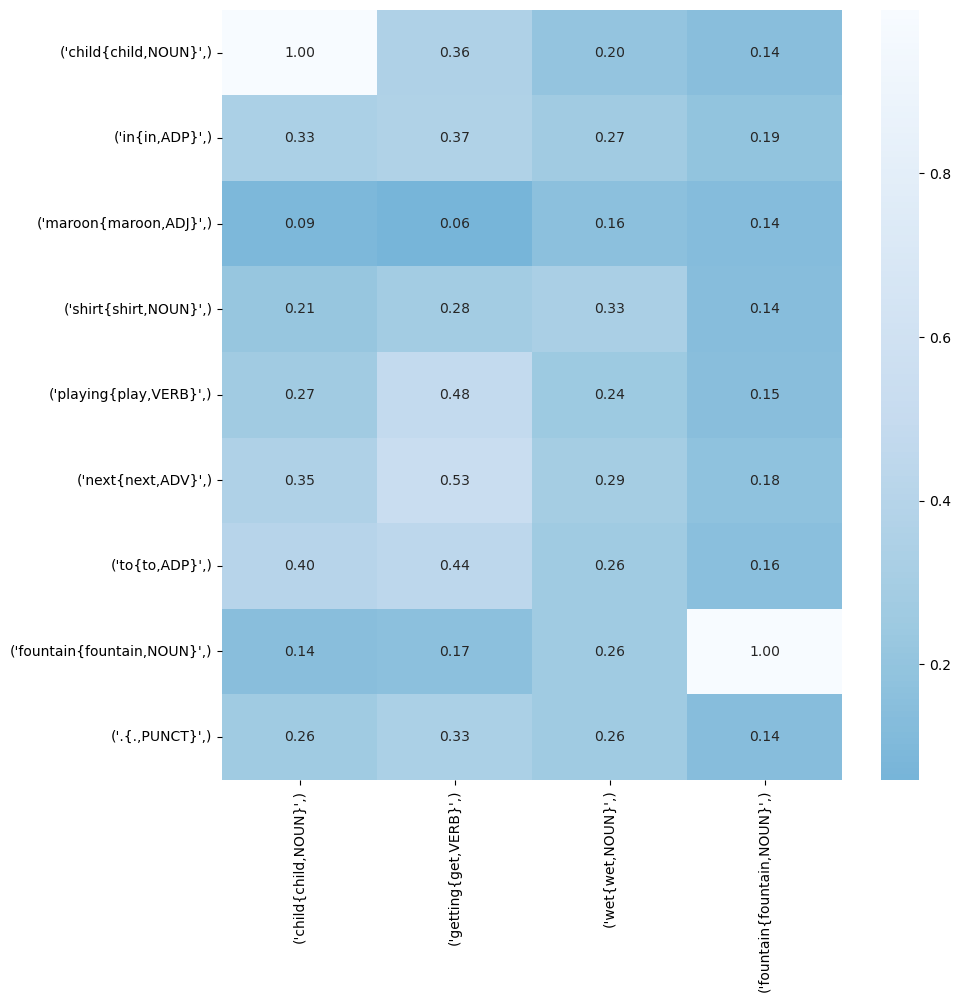

In [77]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(ma, center=0, cmap='Blues_r', annot=True, fmt='.2f')

In [78]:
ma.max().sum()

2.8590837

In [79]:
ma.index

Index([      ('child{child,NOUN}',),              ('in{in,ADP}',),
            ('maroon{maroon,ADJ}',),       ('shirt{shirt,NOUN}',),
            ('playing{play,VERB}',),          ('next{next,ADV}',),
                    ('to{to,ADP}',), ('fountain{fountain,NOUN}',),
                    ('.{.,PUNCT}',)],
      dtype='object')

# Checar cuant suma la información por clase

In [80]:
prueba=pd.read_csv("data/prueba.csv")

In [81]:
prueba

,Unnamed: 0.1,Unnamed: 0,gold_label,sentence1,sentence2,SET
0,568111,558275,entailment,"A man wearing a blue shirt, black apron, eyegl...",A person in appropriate institution protection...,TEST
1,568812,558976,entailment,A man dressed in a red shirt and black tie sta...,a guy in a red top and tie makes a speech,TEST
2,560781,550939,contradiction,A young boy runs across a road in front of a s...,A boy sleeps in his bed.,TEST
3,565799,555963,contradiction,An Asian woman is standing on a path with a ba...,Nobody is standing,TEST
4,562665,552829,neutral,A child in a maroon shirt playing next to a fo...,The child is getting wet from the fountain.,TEST
...,...,...,...,...,...,...
95,567068,557232,entailment,"A group of men in blue shirts, banded hats, an...",a bunch of guys in colorful clothes stand toge...,TEST
96,568650,558814,entailment,A woman holding a newborn baby.,woman holds baby,TEST
97,559485,549643,contradiction,A skateboarding youth does a trick on a rail.,A man painting a tree.,TEST
98,559755,549913,contradiction,Four children are playing in some water.,The children are doing chores.,TEST


In [82]:
def entropia(X):
    """Devuelve el valor de entropia de una muestra de datos""" 
    probs = [np.mean(X == valor) for valor in set(X)]
    return round(sum(-p * np.log2(p) for p in probs), 3)

In [83]:
import timeit



In [112]:
sumas=[]
distancias=[]
entropias=[]
etiquetas=[]
mearts=[]
mutinf=[]
max_info=[]
list_antonimos=[]
listas_malign=[]
lista_anto=[]
lista_related=[]
lista_relatedT=[]
for num, strings in df.iterrows():
    print(num)
    texto_2_t=df.at[num,"Text"]
    hipotesis_2_t=df.at[num,"Hipotesis"]
    texto_2=df.at[num,"R_Text"]
    hipotesis_2=df.at[num,"R_Hip"]
    if len(texto_2_t) > 41 and len(hipotesis_2_t) > 41:
        max_t=41
        max_h=41
    elif len(texto_2_t) > 41:
        max_t=41
        max_h=len(hipotesis_2_t)
    elif len(hipotesis_2_t) > 41:
        max_h=41
        max_t=len(texto_2_t)
    else:
        max_t=len(texto_2_t)
        max_h=len(hipotesis_2_t)
    lista_l=[]
    lista_muinfor=[]    
    for i in range(max_t):
        lista=[]
        lista_mu=[]
        for j in range(max_h):
            #lista.append()
            lista.append(wasserstein_distance(texto_2[i],hipotesis_2[j]))
            lista_mu.append(mi.mutual_information_2d(np.array(texto_2[i]),np.array(hipotesis_2[j])))
        lista_l.append(lista)
        lista_muinfor.append(lista_mu)
    
    meartrh=pd.DataFrame(lista_l[:],index=texto_2_t[:max_t],columns=hipotesis_2_t[:max_h])
    MI_=pd.DataFrame(lista_muinfor[:],index=texto_2_t[:max_t],columns=hipotesis_2_t[:max_h])
    maalign=pd.DataFrame(np.dot(texto_2[:max_t],hipotesis_2[:max_h].T),index=texto_2_t[:max_t],columns=hipotesis_2_t[:max_h])
    col=maalign.columns
    borrar=[]
    indexes=maalign.index
    for c in col:
        if "{null," in str(c) or "{be,VERB" in str(c) or ("NOUN" not in str(c) and "VERB" not in str(c) and "ADJ" not in str(c) and "ADV" not in str(c)):
            borrar.append(c)        
        elif str(c) in indexes:
            borrar.append(c)        
    borrar_i=[]
    for index in indexes:
        if "{null," in str(index) or "{be,VERB" in str(index) or ("NOUN" not in str(index) and "VERB" not in str(index) and "ADJ" not in str(index) and "ADV" not in str(index)):
            borrar_i.append(index) 
        elif str(index) in col:
            borrar_i.append(index) 
    maalign=maalign.drop(borrar,axis=1)
    maalign=maalign.drop(borrar_i,axis=0)
    meartrh=meartrh.drop(borrar,axis=1)
    meartrh=meartrh.drop(borrar_i,axis=0)
    MI_=MI_.drop(borrar,axis=1)
    MI_=MI_.drop(borrar_i,axis=0)
    borrar=[]
    borrar_i=[]
    col=maalign.columns
    for index,strings in maalign.iterrows():
        lema_i=str(index).split("{")[1].split(",")[0]
        for c in col:
            if index==c:
                borrar_i.append(index)
                borrar.append(c)
            if strings[c]>=1:
                borrar_i.append(index)
                borrar.append(c)
            lema_c=str(c).split("{")[1].split(",")[0]
            if lema_i == lema_c:
                borrar_i.append(index)
                borrar.append(c)
    maalign=maalign.drop(borrar,axis=1)
    maalign=maalign.drop(borrar_i,axis=0)
    meartrh=meartrh.drop(borrar,axis=1)
    meartrh=meartrh.drop(borrar_i,axis=0)
    MI_=MI_.drop(borrar,axis=1)
    MI_=MI_.drop(borrar_i,axis=0)
    
    a=maalign.idxmax().values
    b=maalign.columns
    rel=[]
    for i in range(len(a)):
        rel.append((a[i],b[i]))
    #primera vuelta
    
    a,b=encontrar_relaciones(rel[:])
    maalign=maalign.drop(a,axis=1)
    maalign=maalign.drop(b,axis=0)
    meartrh=meartrh.drop(a,axis=1)
    meartrh=meartrh.drop(b,axis=0)
    MI_=MI_.drop(a,axis=1)
    MI_=MI_.drop(b,axis=0)
    
    a=maalign.idxmax().values
    b=maalign.columns
    rel=[]
    for i in range(len(a)):
        rel.append((a[i],b[i]))
        
    d=encontrar_relaciones_contrarias(rel[:])
    r_l1=encontrar_relaciones_cercanas(rel[:])
    # segunda vuelta
    a=maalign.idxmax().values
    b=maalign.columns
    rel=[]
    for i in range(len(a)):
        rel.append((a[i],b[i]))
    a,b=encontrar_relaciones(rel[:])
    maalign=maalign.drop(a,axis=1)
    maalign=maalign.drop(b,axis=0)
    meartrh=meartrh.drop(a,axis=1)
    meartrh=meartrh.drop(b,axis=0)
    MI_=MI_.drop(a,axis=1)
    MI_=MI_.drop(b,axis=0)
    a=maalign.idxmax().values
    b=maalign.columns
    rel=[]
    for i in range(len(a)):
        rel.append((a[i],b[i]))
        
    d1=encontrar_relaciones_contrarias(rel[:])
    r_l2=encontrar_relaciones_cercanas(rel[:])
    
    #alamacenado de resultados
    sumas.append(maalign.min().sum())
    max_info.append((maalign.max().sum()/(maalign.shape[1])))
    entropias.append(entropia(maalign.round(2).values.flatten()))
    mearts.append(meartrh.max().sum())
    mutinf.append(MI_.max().sum())
    distancias.append(obtener_distancia(num,dfp)) 
    d2=[]   
    if d==[] and d1==[]:
        d2=[]
    else:
        d2=list(set(d+d1))
    r2=[]   
    if r_l1==[] and r_l2==[]:
        r2=[]
    else:
        r2=list(set(r_l1+r_l2))
    list_antonimos.append(len(d2))
    listas_malign.append(maalign)
    lista_anto.append(d2)
    lista_related.append(len(r2))
    lista_relatedT.append(r2)

0
food  related_to  meal
food  related_to  meal
1
man  related_to  guy
man  related_to  guy
2
3
4
5
6
7
8
play  related_to  enjoy
snow  related_to  cold
snow  related_to  weather
play  related_to  enjoy
snow  related_to  cold
snow  related_to  weather
9


C:\Users\Ninja\AppData\Local\Temp\ipykernel_8872\2144118115.py:89: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  a=maalign.idxmax().values
C:\Users\Ninja\AppData\Local\Temp\ipykernel_8872\2144118115.py:104: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  a=maalign.idxmax().values
C:\Users\Ninja\AppData\Local\Temp\ipykernel_8872\2144118115.py:113: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  a=maalign.idxmax().values
C:\Users\Ninja\AppData\Local\Temp\ipykernel_8872\2144118115.py:125: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
 

10
11
lawn  related_to  grass
lawn  related_to  grass
12
man  antonym  people
man  related_to  people
man  antonym  people
man  related_to  people
13
14
girl  related_to  child
girl  related_to  child
15
16


C:\Users\Ninja\AppData\Local\Temp\ipykernel_8872\2144118115.py:89: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  a=maalign.idxmax().values
C:\Users\Ninja\AppData\Local\Temp\ipykernel_8872\2144118115.py:104: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  a=maalign.idxmax().values
C:\Users\Ninja\AppData\Local\Temp\ipykernel_8872\2144118115.py:113: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  a=maalign.idxmax().values
C:\Users\Ninja\AppData\Local\Temp\ipykernel_8872\2144118115.py:125: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
 

17
water  related_to  lake
water  related_to  lake
18
dog  antonym  cat
dog  related_to  cat
dog  antonym  cat
dog  related_to  cat
19
boy  related_to  child
boy  related_to  child
20
21


C:\Users\Ninja\AppData\Local\Temp\ipykernel_8872\2144118115.py:89: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  a=maalign.idxmax().values
C:\Users\Ninja\AppData\Local\Temp\ipykernel_8872\2144118115.py:104: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  a=maalign.idxmax().values
C:\Users\Ninja\AppData\Local\Temp\ipykernel_8872\2144118115.py:113: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  a=maalign.idxmax().values
C:\Users\Ninja\AppData\Local\Temp\ipykernel_8872\2144118115.py:125: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
 

22
23
24
25


C:\Users\Ninja\AppData\Local\Temp\ipykernel_8872\2144118115.py:89: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  a=maalign.idxmax().values
C:\Users\Ninja\AppData\Local\Temp\ipykernel_8872\2144118115.py:104: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  a=maalign.idxmax().values
C:\Users\Ninja\AppData\Local\Temp\ipykernel_8872\2144118115.py:113: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  a=maalign.idxmax().values
C:\Users\Ninja\AppData\Local\Temp\ipykernel_8872\2144118115.py:125: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
 

shadow  antonym  light
shadow  related_to  light
shadow  antonym  light
shadow  related_to  light
26
ball  related_to  play
ball  related_to  game
ball  related_to  play
ball  related_to  game
27
28
man  antonym  people
man  related_to  people
book  related_to  reading
book  related_to  material
man  antonym  people
man  related_to  people
book  related_to  reading
book  related_to  material
29
30
guy  related_to  man
guy  related_to  man
31
child  antonym  adult
child  related_to  adult
child  antonym  adult
child  related_to  adult
32
man  antonym  woman
man  similar_to  woman
man  antonym  woman
man  similar_to  woman
33
celebration  derivado_from  celebrate
34
35
36
37


C:\Users\Ninja\AppData\Local\Temp\ipykernel_8872\2144118115.py:89: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  a=maalign.idxmax().values
C:\Users\Ninja\AppData\Local\Temp\ipykernel_8872\2144118115.py:104: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  a=maalign.idxmax().values
C:\Users\Ninja\AppData\Local\Temp\ipykernel_8872\2144118115.py:113: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  a=maalign.idxmax().values
C:\Users\Ninja\AppData\Local\Temp\ipykernel_8872\2144118115.py:125: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
 

man  related_to  father
child  related_to  son
man  related_to  father
child  related_to  son
38
39
40
41
42
43
44
45
46
47
48


C:\Users\Ninja\AppData\Local\Temp\ipykernel_8872\2144118115.py:89: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  a=maalign.idxmax().values
C:\Users\Ninja\AppData\Local\Temp\ipykernel_8872\2144118115.py:104: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  a=maalign.idxmax().values
C:\Users\Ninja\AppData\Local\Temp\ipykernel_8872\2144118115.py:113: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  a=maalign.idxmax().values
C:\Users\Ninja\AppData\Local\Temp\ipykernel_8872\2144118115.py:125: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
 

middle  distinct from  back
wave  related_to  ocean
middle  distinct from  back
wave  related_to  ocean
49
50


C:\Users\Ninja\AppData\Local\Temp\ipykernel_8872\2144118115.py:89: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  a=maalign.idxmax().values
C:\Users\Ninja\AppData\Local\Temp\ipykernel_8872\2144118115.py:104: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  a=maalign.idxmax().values
C:\Users\Ninja\AppData\Local\Temp\ipykernel_8872\2144118115.py:113: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  a=maalign.idxmax().values
C:\Users\Ninja\AppData\Local\Temp\ipykernel_8872\2144118115.py:125: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
 

51
52
53
54
55


C:\Users\Ninja\AppData\Local\Temp\ipykernel_8872\2144118115.py:89: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  a=maalign.idxmax().values
C:\Users\Ninja\AppData\Local\Temp\ipykernel_8872\2144118115.py:104: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  a=maalign.idxmax().values
C:\Users\Ninja\AppData\Local\Temp\ipykernel_8872\2144118115.py:113: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  a=maalign.idxmax().values
C:\Users\Ninja\AppData\Local\Temp\ipykernel_8872\2144118115.py:125: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
 

56
57
58
59
60
61
62
63
64
65
66
67


C:\Users\Ninja\AppData\Local\Temp\ipykernel_8872\2144118115.py:89: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  a=maalign.idxmax().values
C:\Users\Ninja\AppData\Local\Temp\ipykernel_8872\2144118115.py:104: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  a=maalign.idxmax().values
C:\Users\Ninja\AppData\Local\Temp\ipykernel_8872\2144118115.py:113: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  a=maalign.idxmax().values
C:\Users\Ninja\AppData\Local\Temp\ipykernel_8872\2144118115.py:125: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
 

man  related_to  guy
man  related_to  guy
68
woman  antonym  person
woman  related_to  person
woman  antonym  person
woman  related_to  person
69
man  antonym  woman
man  similar_to  woman
man  antonym  woman
man  similar_to  woman
70


C:\Users\Ninja\AppData\Local\Temp\ipykernel_8872\2144118115.py:104: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  a=maalign.idxmax().values
C:\Users\Ninja\AppData\Local\Temp\ipykernel_8872\2144118115.py:113: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  a=maalign.idxmax().values
C:\Users\Ninja\AppData\Local\Temp\ipykernel_8872\2144118115.py:125: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  a=maalign.idxmax().values
C:\Users\Ninja\AppData\Local\Temp\ipykernel_8872\2144118115.py:136: RuntimeWarning: invalid value encountered in double_scalars
  max_info.append((maalign.max().sum()/(maalign.shape[1])))


71
man  antonym  woman
man  similar_to  woman
man  antonym  woman
man  similar_to  woman
72
guy  related_to  man
guy  related_to  man
73
74
75
76
77
78


C:\Users\Ninja\AppData\Local\Temp\ipykernel_8872\2144118115.py:89: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  a=maalign.idxmax().values
C:\Users\Ninja\AppData\Local\Temp\ipykernel_8872\2144118115.py:104: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  a=maalign.idxmax().values
C:\Users\Ninja\AppData\Local\Temp\ipykernel_8872\2144118115.py:113: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  a=maalign.idxmax().values
C:\Users\Ninja\AppData\Local\Temp\ipykernel_8872\2144118115.py:125: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
 

79
orange  related_to  yellow
orange  related_to  yellow
80
81
wreck  related_to  damage
wreck  related_to  damage
82
83
84


C:\Users\Ninja\AppData\Local\Temp\ipykernel_8872\2144118115.py:89: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  a=maalign.idxmax().values
C:\Users\Ninja\AppData\Local\Temp\ipykernel_8872\2144118115.py:104: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  a=maalign.idxmax().values
C:\Users\Ninja\AppData\Local\Temp\ipykernel_8872\2144118115.py:113: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  a=maalign.idxmax().values
C:\Users\Ninja\AppData\Local\Temp\ipykernel_8872\2144118115.py:125: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
 

boy  antonym  girl
boy  related_to  girl
boy  antonym  girl
boy  related_to  girl
85


C:\Users\Ninja\AppData\Local\Temp\ipykernel_8872\2144118115.py:89: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  a=maalign.idxmax().values
C:\Users\Ninja\AppData\Local\Temp\ipykernel_8872\2144118115.py:104: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  a=maalign.idxmax().values
C:\Users\Ninja\AppData\Local\Temp\ipykernel_8872\2144118115.py:113: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  a=maalign.idxmax().values
C:\Users\Ninja\AppData\Local\Temp\ipykernel_8872\2144118115.py:125: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
 

86
87
88
mother  antonym  father
mother  related_to  father
mother  antonym  father
mother  related_to  father
89
red  antonym  blue
red  antonym  blue
90
boy  related_to  child
boy  related_to  child
91
lady  related_to  young
audience  related_to  people
lady  related_to  young
audience  related_to  people
92
93


C:\Users\Ninja\AppData\Local\Temp\ipykernel_8872\2144118115.py:89: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  a=maalign.idxmax().values
C:\Users\Ninja\AppData\Local\Temp\ipykernel_8872\2144118115.py:104: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  a=maalign.idxmax().values
C:\Users\Ninja\AppData\Local\Temp\ipykernel_8872\2144118115.py:113: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  a=maalign.idxmax().values
C:\Users\Ninja\AppData\Local\Temp\ipykernel_8872\2144118115.py:125: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
 

94
95
man  related_to  guy
shirt  related_to  clothe
man  related_to  guy
shirt  related_to  clothe
96
97


C:\Users\Ninja\AppData\Local\Temp\ipykernel_8872\2144118115.py:89: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  a=maalign.idxmax().values
C:\Users\Ninja\AppData\Local\Temp\ipykernel_8872\2144118115.py:104: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  a=maalign.idxmax().values
C:\Users\Ninja\AppData\Local\Temp\ipykernel_8872\2144118115.py:113: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  a=maalign.idxmax().values
C:\Users\Ninja\AppData\Local\Temp\ipykernel_8872\2144118115.py:125: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
 

98
play  related_to  do
play  related_to  do
99


In [113]:
meartrh

,"actually{actually,ADV}","sasquatch{sasquatch,NOUN}"
"dressed{dress,VERB}",0.005627,0.009660
"suits{suit,NOUN}",0.009887,0.005550
"ties{tie,NOUN}",0.008758,0.006563
"clasps{clasp,VERB}",0.011448,0.005406
"their{-PRON-,ADJ}",0.004394,0.013741
"raised{raise,VERB}",0.008580,0.009331
"hands{hand,NOUN}",0.005058,0.011088
"standing{stand,VERB}",0.005231,0.009481
"front{front,NOUN}",0.009058,0.006825
"corporate{corporate,ADJ}",0.008859,0.009759


In [114]:
maalign

,"actually{actually,ADV}","sasquatch{sasquatch,NOUN}"
"dressed{dress,VERB}",0.389713,0.088503
"suits{suit,NOUN}",0.344928,0.052184
"ties{tie,NOUN}",0.277400,0.010205
"clasps{clasp,VERB}",0.016735,-0.006220
"their{-PRON-,ADJ}",0.464549,-0.038553
"raised{raise,VERB}",0.409186,-0.010537
"hands{hand,NOUN}",0.435277,-0.019895
"standing{stand,VERB}",0.433906,0.029716
"front{front,NOUN}",0.355166,-0.004828
"corporate{corporate,ADJ}",0.266992,-0.026747


In [115]:
listas_malign

[                           appropriate{appropriate,ADJ}  \
 wearing{wear,VERB}                             0.262003   
 blue{blue,ADJ}                                 0.200447   
 shirt{shirt,NOUN}                              0.181804   
 black{black,ADJ}                               0.155567   
 apron{apron,NOUN}                              0.172354   
 eyeglasses{eyeglass,NOUN}                      0.182274   
 mask{mask,NOUN}                                0.283393   
 handling{handle,VERB}                          0.453544   
 food{food,NOUN}                                0.323334   
 tray{tray,NOUN}                                0.215358   
 
                            institution{institution,NOUN}  \
 wearing{wear,VERB}                              0.109911   
 blue{blue,ADJ}                                  0.028813   
 shirt{shirt,NOUN}                               0.075410   
 black{black,ADJ}                                0.102473   
 apron{apron,NOUN}               

In [116]:
clases=prueba["gold_label"].values
temp =np.array([listas_malign,lista_anto,clases])
temp = pd.DataFrame(temp.T,columns=["malign","antonimos","CLASS"])
temp.to_pickle("salida/data4F.pickle")

C:\Users\Ninja\AppData\Local\Temp\ipykernel_8872\1896556123.py:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  temp =np.array([listas_malign,lista_anto,clases])


# Revision de matriz de alineamiento

In [117]:
#temp.at[ch,"antonimos"]

In [118]:
#temp.at[ch,"malign"].max().sum()/temp.at[ch,"malign"].shape[1]

In [128]:
clases=prueba["gold_label"].values
temp1 =np.array([sumas,distancias,entropias,mutinf,mearts,max_info,list_antonimos,lista_related,clases])
df_sumas = pd.DataFrame(temp1.T,columns=["suma","distancias","entropias","mutual_info","m_earth","max_info_p","antonimos","relaciones","CLASS"])
df_sumas

,suma,distancias,entropias,mutual_info,m_earth,max_info_p,antonimos,relaciones,CLASS
0,0.382265,39.145676,4.734,6.089623,0.046611,0.41685,0,1,entailment
1,0.321535,13.863625,3.379,1.644741,0.018028,0.565131,0,1,entailment
2,0.145214,21.441418,4.357,2.797228,0.027092,0.37404,0,0,contradiction
3,0.184051,5.69077,3.278,0.727185,0.01073,0.428242,0,0,contradiction
4,0.217909,12.320528,3.0,1.731026,0.01684,0.429542,0,0,neutral
...,...,...,...,...,...,...,...,...,...
95,0.538654,29.301109,4.739,5.542243,0.045517,0.521862,0,2,entailment
96,0.0,4.414777,0,0.0,0.0,NaN,0,0,entailment
97,0.473886,20.708521,3.457,3.062808,0.027729,0.335611,0,0,contradiction
98,0.484735,14.175783,2.0,1.889121,0.016444,0.372568,0,1,contradiction


In [97]:
df_sumas.at[3,"distancias"]

5.6907697

In [131]:
#df_sumas.to_csv("salida/prueba_medidas.csv",index=False)
df_sumas.to_csv("salida/prueba_medidas2.csv",index=False)

<AxesSubplot:title={'center':'antonimos'}, xlabel='CLASS'>

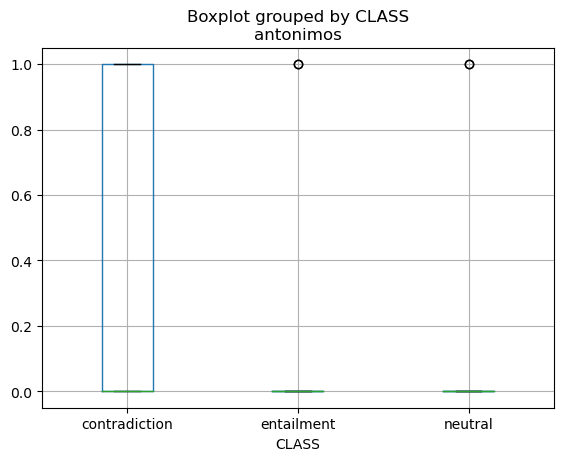

In [121]:
df_sumas.boxplot(by="CLASS",column=["antonimos"])

<AxesSubplot:title={'center':'relaciones'}, xlabel='CLASS'>

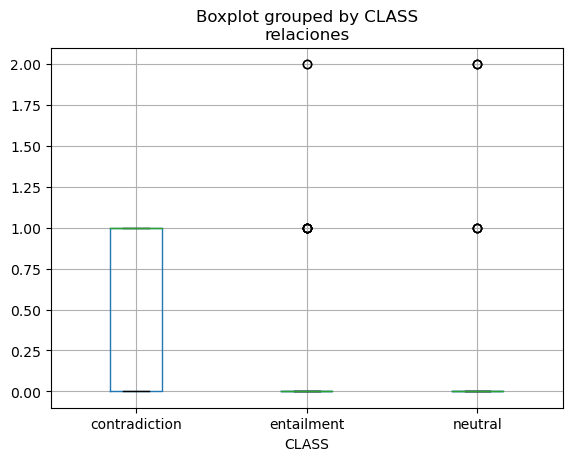

In [129]:
df_sumas.boxplot(by="CLASS",column=["relaciones"])

<AxesSubplot:title={'center':'distancias'}, xlabel='CLASS'>

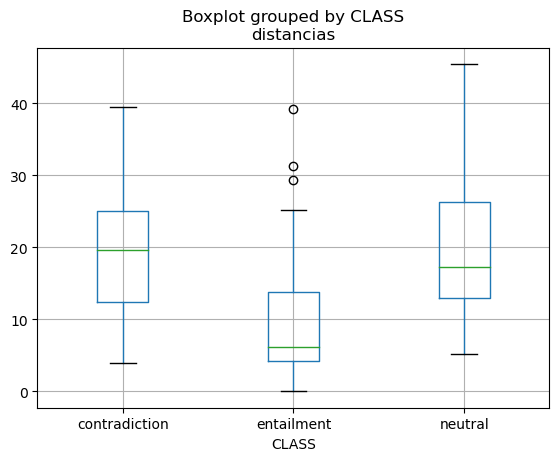

In [123]:
df_sumas.boxplot(by="CLASS",column=["distancias"])

<AxesSubplot:title={'center':'mutual_info'}, xlabel='CLASS'>

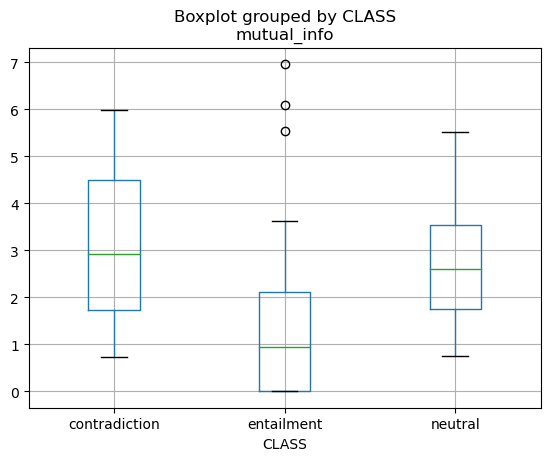

In [124]:
df_sumas.boxplot(by="CLASS",column=["mutual_info"])

<AxesSubplot:title={'center':'suma'}, xlabel='CLASS'>

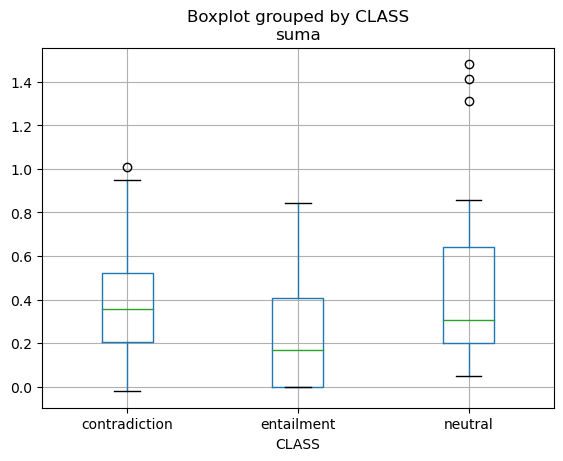

In [125]:
df_sumas.boxplot(by="CLASS",column=["suma"])

<AxesSubplot:title={'center':'entropias'}, xlabel='CLASS'>

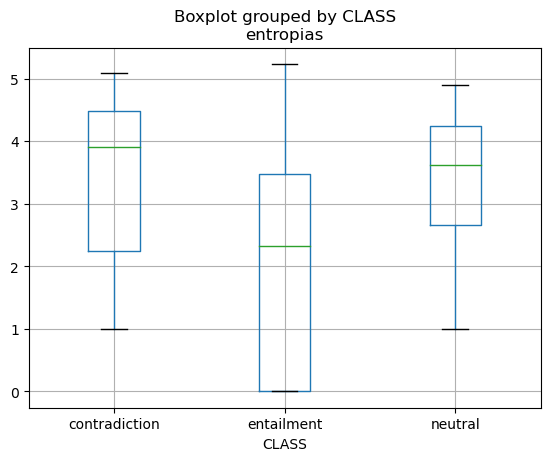

In [126]:
df_sumas.boxplot(by="CLASS",column=["entropias"])

<AxesSubplot:title={'center':'max_info_p'}, xlabel='CLASS'>

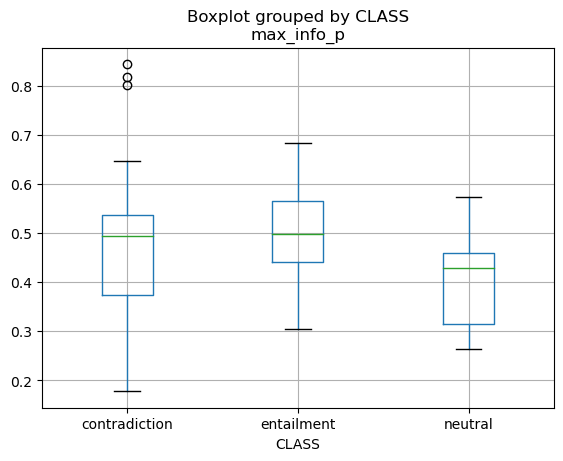

In [127]:
df_sumas.boxplot(by="CLASS",column=["max_info_p"])

# Texto -> Hipótesis, tomando la longitud de la hipótesis en [NOUN,VERB,ADJ,ADV]

In [78]:
maximo=0
columna_v=""
indice_v=""
for c in ma.columns:
    if("VERB" in str(c)):
        for index,strings in ma.iterrows():
            if "VERB" in str(index):
                if maximo<strings[c]:
                    maximo=strings[c]
                    columna_v=c
                    indice_v=index
                #print(ma[c].max(),c,ma[c].idxmax())v
print(maximo, columna_v,indice_v)


0  


In [79]:
ma.quantile(0.25).values

array([0.24844589])

In [89]:
def getRelacionesMA(num,df):
    indices=[]
    todas_relaciones=[]
    todas_relacionest=[]
##### REDUCCIÓN DE MATRIZ DE ALINEAMIENTO
    sumas=[]
    distancias=[]
    entropias=[]
    mearts=[]
    mutinf=[]
    max_info=[]
    texto_2_t=df.at[num,"Text"]
    hipotesis_2_t=df.at[num,"Hipotesis"]
    texto_2=df.at[num,"R_Text"]
    hipotesis_2=df.at[num,"R_Hip"]
    if len(texto_2_t) > 41 and len(hipotesis_2_t) > 41:
        max_t=41
        max_h=41
    elif len(texto_2_t) > 41:
        max_t=41
        max_h=len(hipotesis_2_t)
    elif len(hipotesis_2_t) > 41:
        max_h=41
        max_t=len(texto_2_t)
    else:
        max_t=len(texto_2_t)
        max_h=len(hipotesis_2_t)
    lista_l=[]
    lista_muinfor=[]    
    for i in range(max_t):
        lista=[]
        lista_mu=[]
        for j in range(max_h):
            #lista.append()
            lista.append(wasserstein_distance(texto_2[i],hipotesis_2[j]))
            lista_mu.append(mi.mutual_information_2d(np.array(texto_2[i]),np.array(hipotesis_2[j])))
        lista_l.append(lista)
        lista_muinfor.append(lista_mu)
    meartrh=pd.DataFrame(lista_l[:],index=texto_2_t[:max_t],columns=hipotesis_2_t[:max_h])
    MI_=pd.DataFrame(lista_muinfor[:],index=texto_2_t[:max_t],columns=hipotesis_2_t[:max_h])
    maalign=pd.DataFrame(np.dot(texto_2[:max_t],hipotesis_2[:max_h].T),index=texto_2_t[:max_t],columns=hipotesis_2_t[:max_h])
    col=maalign.columns
    borrar=[]
    indexes=maalign.index
    for c in col:
        if "{null," in str(c) or "{be,VERB" in str(c) or ("NOUN" not in str(c) and "VERB" not in str(c) and "ADJ" not in str(c) and "ADV" not in str(c)):
            borrar.append(c)        
        elif str(c) in indexes:
            borrar.append(c)        
    borrar_i=[]
    for index,strings in maalign.iterrows():
        if "{null," in str(c) or "{be,VERB" in str(index) or ("NOUN" not in str(index) and "VERB" not in str(index) and "ADJ" not in str(index) and "ADV" not in str(index)):
            borrar_i.append(index) 
        elif str(index) in col:
            borrar_i.append(index) 
    maalign=maalign.drop(borrar,axis=1)
    maalign=maalign.drop(borrar_i,axis=0)
    meartrh=meartrh.drop(borrar,axis=1)
    meartrh=meartrh.drop(borrar_i,axis=0)
    MI_=MI_.drop(borrar,axis=1)
    MI_=MI_.drop(borrar_i,axis=0)
    borrar=[]
    borrar_i=[]
    col=maalign.columns
    for index,strings in maalign.iterrows():
        lema_i=str(index).split("{")[1].split(",")[0]
        for c in col:
            if index==c:
                borrar_i.append(index)
                borrar.append(c)
            if strings[c]>=1:
                borrar_i.append(index)
                borrar.append(c)
            lema_c=str(c).split("{")[1].split(",")[0]
            if lema_i == lema_c:
                borrar_i.append(index)
                borrar.append(c)
    maalign=maalign.drop(borrar,axis=1)
    maalign=maalign.drop(borrar_i,axis=0)
    meartrh=meartrh.drop(borrar,axis=1)
    meartrh=meartrh.drop(borrar_i,axis=0)
    MI_=MI_.drop(borrar,axis=1)
    MI_=MI_.drop(borrar_i,axis=0)
    sumas.append(maalign.max().sum())
    max_info.append((maalign.max().sum()/(maalign.shape[0])))
    entropias.append(entropia(maalign.round(2).values.flatten()))
    mearts.append(meartrh.min().sum())
    mutinf.append(MI_.max().sum())
    distancias.append(obtener_distancia(num,dfp))
    encontrar_relaciones(maalign)
    
#####
    #
    
    # distancia_words=obtener_distancia(indice,dfp)/len(c)
    # suma_words=ma.sum().sum()
    # informacion_words=ma.max().sum()

    # maximo=0
    # indice_v=""
    # columna_v=""
    # c=ma.max()
    # for l in range(len(c)):
    #     for index,strings in ma.iterrows():
    #         if("VERB" in str(index)):
    #             if("VERB" in str(ma.columns[l])):
    #                 if maximo<c[l]:
    #                     maximo=c[l]
    #                     columna_v=str(ma.columns[l]).split('\'')[1].split("{")[0]
    #                     indice_v=str(index).split('\'')[1].split("{")[0]
    # print(indice_v,columna_v)
    # #Dirección contraria
    # # mat=ma.transpose()
    # # c1=mat.mean().values #.quantile(corte).values
    # # for index,strings in mat.iterrows():
    # #     for l in range(len(c1)):
    # #         if 'NOUN' in str(index) or 'ADJ' in str(index) or 'PRON' in str(index) or 'ADV' in str(index):                
    # #             if 'NOUN' in str(mat.columns[l]) or 'ADJ' in str(mat.columns[l]) or 'PRON' in str(mat.columns[l]) or 'ADV' in str(mat.columns[l]):
    # #                 if strings[l] >=c1[l]:# >=1:
    # #                     todas_relacionest.append((index,mat.columns[l],strings[l]))
    # labels=["NOUN","ADJ","ADV"]
    # diccionarioTW = {}
    # print(todas_relaciones)
    # for l1 in labels[:]:
    #     for l2 in labels[:]:
    #         diccionarioTW[l1+"_"+l2]=[]
    # for tr in todas_relaciones:
    #     #print(tr[0],"-",tr[1])
    #     t_=str(tr[0]).split(",")
    #     pt=t_[1].split("}")[0]
    #     h_=str(tr[1]).split(",")
    #     #print(t_,h_,"h0",h_[0])
    #     ph=h_[1].split("}")[0]
    #     if pt=="PRON":
    #         pt="NOUN"
    #     if ph=="PRON":
    #         ph="NOUN"
    #     #diccionarioTW[pt+"_"+ph].append(tr[2])
    #     if pt+"_"+ph in diccionarioTW:
    #         diccionarioTW[pt+"_"+ph].append(tr[2])
    # diccionarioTW_mean={}
    # #diccionarioTW_mean_n={}
    # #diccionarioTW_rel={}
    # for k in diccionarioTW:
    #     if len(diccionarioTW[k])!=0:
    #         diccionarioTW_mean[k]=sum(diccionarioTW[k])/len(diccionarioTW[k])
    #         #diccionarioTW_mean_n[k+"_"]=len(diccionarioTW[k])#/ma.shape[0]
    #         #diccionarioTW_rel[k+"_r"]=sum(diccionarioTW[k])/len(diccionarioTW[k])#/ma.shape[0]
    #     else:
    #         diccionarioTW_mean[k]=0
    #         #diccionarioTW_mean_n[k+"_"]=0
    #         #diccionarioTW_rel[k+"_r"]=0
    # return diccionarioTW_mean,todas_relaciones,indice_v,columna_v,distancia_words,suma_words,informacion_words
    # #return diccionarioTW_mean,diccionarioTW_mean_n,todas_relaciones,todas_relacionest,diccionarioTW_rel,indice_v,columna_v,distancia_words,suma_words,informacion_words

In [97]:
getRelacionesMA(42,df)

/tmp/ipykernel_66225/781148394.py:4: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  return round(np.sum(-p * np.log2(p) for p in probs), 3)


buscar en conceptnet null perfectly
buscar en conceptnet null free
buscar en conceptnet play perfectly
buscar en conceptnet play free
buscar en conceptnet rugby perfectly
buscar en conceptnet rugby free
buscar en conceptnet cover perfectly
buscar en conceptnet cover free
Columnas macheadas []
Columnas macheadas []
Antonimos []


# Lectura de los 100 pares de T y H (muestreo)

In [93]:
prueba=pd.read_csv("data/prueba.csv")

In [43]:
textos = prueba["sentence1"].to_list()
hipotesis = prueba["sentence2"].to_list()
print(textos)
print(hipotesis)

['A man wearing a blue shirt, black apron, eyeglasses, and a mask is handling food in a tray.', 'A man dressed in a red shirt and black tie stands up at a wedding reception to make a speech.', 'A young boy runs across a road in front of a sky blue building with barred windows.', 'An Asian woman is standing on a path with a basket on her head looking into a mirror she is holding in her hand.', 'A child in a maroon shirt playing next to a fountain.', 'man dressed in orange clothing with face covered seemingly balancing on a cane being held be a similarly dressed man sitting crossed legged on the ground at a shopping mall.', 'An old man with a package poses in front of an advertisement.', 'People dressed in traditional Japanese garb walk in a procession through a courtyard paved with paving stones.', 'Two children play in the snow by the side of the road.', 'Blond-haired girl wearing a bicycle helmet, a black t-shirt that reads "Twizzlers" and a printed dog tag necklace around her neck.',

In [44]:
hipotesis[28]

'People near a lot of reading materials.'

In [45]:
textos[28]

'Man and a woman at the side of a table covered in books.'

In [46]:
import nltk, re, os
from nltk.corpus import wordnet as wn
import networkx as nx
from matplotlib import pyplot as plt


# Antonimia e hiponimia

In [198]:
def revision_ant_hipo(relaciones_alineadas,wn):
    sinonimos_words=[]
    antonimos_words=[]
    hyperonyms_words=[]
    hyponyms_words=[]
    relaciones_fuertes=[]
    synonyms=[]
    antonyms=[]
    is_a=[]
    verbos=[]
    for r_a in relaciones_alineadas[:]:
        sim=0
        pal_sim_a=""
        pal_sim_b=""
        print(r_a[0],"a",r_a[1])
        word_t = str(r_a[0]).split('\'')[1]
        wt = word_t.split('{')[0]
        lt = word_t.split('}')[0].split(',')[0].split('{')[1]
        #print(word_t)
        #print(word_t.split('}')[0].split(','))
        if len(word_t.split('}')[0].split(','))==2:
            pt = word_t.split('}')[0].split(',')[1]
        else:
            pt=""
        #print(pt)
        w_in_text= wt + "," + pt
        #print(wt,lt,pt)
        word_h = str(r_a[1]).split('\'')[1]
        wh = word_h.split('{')[0] #palabra tal cual
        lh = word_h.split('}')[0].split(',')[0].split('{')[1] #palabra lematizada
        #print(word_h)
        if len(word_h.split('}')[0].split(','))==2:
            ph = word_h.split('}')[0].split(',')[1] # pos de la palabra
        else:
            ph=""
        #print(ph)
        word = wh + "," + ph # palabra con el pos correspondiente
        #print(wh,lh,ph)
        
        #BUSCAR EN CONCEPTNET 5.7
        bandera_concept=0
        try:
            print("buscar en conceptnet",wt,wh)
            for e in edges_for(Label.get(text=wh, language='en').concepts, same_language=True):
                if "synonym"==e.relation.name:
                    if wh== e.start.text:
                        if e.end.text==wt:
                            print("sinonimos conceptnet",wh,wt)
                            synonyms.append(wt)
                            relaciones_fuertes.append((wt,wh,wt,wh,1,0))
                            bandera_concept=1
                            break
                    else:
                        if e.start.text==wt:
                            print("sinonimos conceptnet",wh,wt)
                            synonyms.append(wt)
                            relaciones_fuertes.append((wt,wh,wt,wh,1,0))
                            bandera_concept=1
                            break
                elif "antonym" ==e.relation.name:
                    if wh== e.start.text:
                        if e.end.text==wt:
                            print("antonimos conceptnet",wh,wt)
                            bandera_concept=1
                            antonyms.append(wt)
                            break
                elif "is_a" ==e.relation.name:
                    if wh== e.start.text:
                        if e.end.text==wt:
                            print("is a  conceptnet",wh,wt)
                            bandera_concept=1
                            relaciones_fuertes.append((wt,wh,wt,wh,1,0))
                            is_a.append(wt)
                            break
                    else:
                        if e.start.text==wt:
                            print("isa  conceptnet",wh,wt)
                            bandera_concept=1
                            relaciones_fuertes.append((wt,wh,wt,wh,1,0))
                            is_a.append(wt)
                            break
        except:
            print("no esta en conceptnet:",wh)

        #Si no hay relaciones de sinonimia o hiperonimia entonces buscamos relaciones en wordnet la maxima que tenga para despues
        # procesarlos con algunas medidas
        if bandera_concept==0:
            # buscamos medidas de las relaciones alineadas a traves de wordnet
            if pt == "NOUN" or pt=="PRON":
                w1_=wn.synsets(wt,wn.NOUN)
            elif pt == "VERB":
                w1_=wn.synsets(wt,wn.VERB)
            elif pt == "ADJ":
                w1_=wn.synsets(wt,wn.ADJ)
            elif pt == "ADV":
                w1_=wn.synsets(wt,wn.ADV)
            else:
                w1_=wn.synsets(wt)
            if ph == "NOUN" or ph=="PRON":
                w2_=wn.synsets(wh,wn.NOUN)
            elif ph == "VERB":
                w2_=wn.synsets(wh,wn.VERB)
            elif ph == "ADJ":
                w2_=wn.synsets(wh,wn.ADJ)
            elif ph == "ADV":
                w2_=wn.synsets(wh,wn.ADV)
            else:
                w2_=wn.synsets(wh)
            w1_=wn.synsets(wt)
            w2_=wn.synsets(wh)
            for a in w1_:
                for b in w2_:         
                    if a.wup_similarity(b)>sim:
                        sim=a.wup_similarity(b)
                        pal_sim_a=a
                        pal_sim_b=b
            # SI TENEMOS MISMOS POS ENTONCES NECESITAMOS QUE CUMPLAN LO SIGUIENTE:
            # SIM != 0Y MAYOR QUE 0.5, DISTANCIA MENOR QUE 4
            if pt==ph:
                if pt=="VERB":
                    verbos.append((wt,wh,sim))
                if sim!=0:
                    print("wup_sim:","Palabra1: ",pal_sim_a,"Palabra2:",pal_sim_b,sim)
                    if pal_sim_a.path_similarity(pal_sim_b, simulate_root=False)!=None:
                        print("path_sim:","Palabra1: ",pal_sim_a,"Palabra2:",pal_sim_b,pal_sim_a.path_similarity(pal_sim_b, simulate_root=False))
                    if pal_sim_a.shortest_path_distance(pal_sim_b)!=None:
                        print("spath:","Palabra1: ",pal_sim_a,"Palabra2:",pal_sim_b,pal_sim_a.shortest_path_distance(pal_sim_b))
                    if pal_sim_a.pos()==pal_sim_b.pos():
                        print("lch:","Palabra1: ",pal_sim_a,"Palabra2:",pal_sim_b,pal_sim_a.lch_similarity(pal_sim_b))
                    
                    #relaciones fuertes combinando las medidas de wordnet
                    #wup nos ayuda a filtrar que tan similares son
                    #distancia más corta nos ayuda a identificar que no se encuentren muy lejos en el arbol de wordnet
                    #lch similarity ayuda a identificar que en la taxonomia no se encunetren alejados, para los que
                    #tienen unj hiperonimo en comun

                    if sim>=0.5:
                        if pal_sim_a.shortest_path_distance(pal_sim_b)!=None:
                            if pal_sim_a.shortest_path_distance(pal_sim_b)<4:
                                #if pal_sim_a.pos()==pal_sim_b.pos():
                                    #print(pal_sim_a,pal_sim_b,pal_sim_a.lch_similarity(pal_sim_b))
                                    #if pal_sim_a.lch_similarity(pal_sim_b)<2:
                                relaciones_fuertes.append((wt,wh,pal_sim_a,pal_sim_b,sim,pal_sim_a.shortest_path_distance(pal_sim_b)))
                                    
                    #else:
                    #    relaciones_debiles.append((pal_sim_a,pal_sim_b,-sim))
                    #Busqueda de relaciones de sinonimia y antonimia
                    #synonymsW=[]
                    #antonymsW=[]   
                    #for l in pal_sim_a.lemmas():
                    #    synonymsW.append(l.name())
                    #if wh in synonyms:
                    #    print("Sinonimo: ",wt,wh)
                    #    sinonimos_words.append((wt,wh))
                    #    relaciones_fuertes.append((wt,wh,pal_sim_a,pal_sim_b,sim,pal_sim_a.shortest_path_distance(pal_sim_b)))
                    #Busqueda de relaciones de hiperonimia e hiponimia
                    # hyperonyms=pal_sim_a.hypernym_paths()
                    # for p in hyperonyms:
                    #     if pal_sim_b in p:
                    #         if(pal_sim_a.shortest_path_distance(pal_sim_b)!=0):
                    #             print("hiperonimo:",pal_sim_a,pal_sim_b,pal_sim_a.shortest_path_distance(pal_sim_b))
                    #             hyperonyms_words.append((wt,wh))
                    #             relaciones_fuertes.append((wt,wh,pal_sim_a,pal_sim_b,sim,pal_sim_a.shortest_path_distance(pal_sim_b)))
                    #         else:
                    #             sinonimos_words.append((wt,wh))
                    #             relaciones_fuertes.append((wt,wh,pal_sim_a,pal_sim_b,sim,pal_sim_a.shortest_path_distance(pal_sim_b)))
                    # hyponyms=pal_sim_b.hypernym_paths()
                    # for p in hyponyms:
                    #     if pal_sim_a in p:
                    #         if pal_sim_a.shortest_path_distance(pal_sim_b)!=0:
                    #             print("Hiponimo:",pal_sim_a,pal_sim_b,pal_sim_b.shortest_path_distance(pal_sim_a))
                    #             hyponyms_words.append((wt,wh))
                    # for lh in pal_sim_a.lowest_common_hypernyms(pal_sim_b):
                    #     print("minimos hyper",lh)
                    #     print("a->H",pal_sim_a.shortest_path_distance(lh))
                    #     if pal_sim_a.shortest_path_distance(lh)==1:
                    #         relaciones_fuertes.append((wt,wh,pal_sim_a,pal_sim_b,sim,pal_sim_a.shortest_path_distance(pal_sim_b)))
                    #     print("b->H",pal_sim_b.shortest_path_distance(lh))
                    #     if pal_sim_b.shortest_path_distance(lh)==1:
                    #         relaciones_fuertes.append((wt,wh,pal_sim_a,pal_sim_b,sim,pal_sim_a.shortest_path_distance(pal_sim_b)))
                    # print()
            elif ph=="ADJ":
                if sim>=0.3:
                    relaciones_fuertes.append((wt,wh,pal_sim_a,pal_sim_b,sim,pal_sim_a.shortest_path_distance(pal_sim_b)))
    print("sinonimos",len(set(sinonimos_words)),sinonimos_words)
    print("antonimos",len(set(antonimos_words)),antonimos_words)
    print("hyperonyms",len(set(hyperonyms_words)),hyperonyms_words)
    print("hyponyms",len(set(hyponyms_words)),hyponyms_words)
    print("relaciones alineadas",relaciones_alineadas)
    print("relaciones fuertes:",relaciones_fuertes)
    tokens_h=[]
    for rl in relaciones_fuertes:
        tokens_h.append(rl[1])
    tokens_h=list(set(tokens_h))
    #sumaf=[]
    # for rl in relaciones_fuertes:
    #     sumaf.append(rl[4])
    # #print("relaciones debiles:",relaciones_debiles)
    # print("verbos: ",verbos)
    # maxv=0
    # for v in verbos:
    #     print(v)
    #     if(float(v[2])>=maxv):
    #         maxv=v[2]
    #         v1=v[0]
    #         v2=v[1]
    # #print(v1,v2)  
    # if len(sumaf)==0:
    #     sum_as=0
    # else:
    #     sum_as=sum(sumaf)/len(sumaf)
    #return [len(set(sinonimos_words)),len(set(antonimos_words)),len(set(hyperonyms_words)),len(set(hyponyms_words)),sum_as],tokens_h
    return [len(set(synonyms))+len(set(sinonimos_words)),len(set(antonyms)),len(set(is_a))+len(set(hyperonyms_words))],relaciones_fuertes,tokens_h

In [157]:
# import spacy

# nlp = spacy.load("en_core_web_md")
# doc = nlp("A man is not dressed in orange clothing seemingly balancing on a cane being held be a similarly dressed man sitting crossed legged on the ground at a shopping mall")

# for token in doc:
#     print(token.text, token.lemma_, token.pos_, token.tag_, token.dep_,
#             token.shape_, token.is_alpha, token.is_stop)
#     if token.dep_=="ROOT":
#         r=token.text
# print(r)

In [49]:
#import spacy
#from spacy import displacy

# nlp = spacy.load("en_core_web_md")
# doc = nlp("A man is not dressed in orange clothing seemingly balancing on a cane being held be a similarly dressed man sitting crossed legged on the ground at a shopping mall")
# displacy.serve(doc, style="dep")

In [158]:
# nlp = spacy.load("en_core_web_md")  # make sure to use larger package!
# doc1 = nlp("An old man runs in front of an advertisement.")
# doc2 = nlp("A man sleeps in front of an ad for beer.")
# for token in doc1:
#     print(token.text, token.lemma_, token.pos_, token.tag_, token.dep_,
#             token.shape_, token.is_alpha, token.is_stop)
#     if token.dep_=="ROOT":
#         r_t=token
# print(r_t)
# for token in doc2:
#     #print(token.text, token.lemma_, token.pos_, token.tag_, token.dep_,
#     #        token.shape_, token.is_alpha, token.is_stop)
#     if token.dep_=="ROOT":
#         r_h=token
# print(r_h)
# # Similarity of two documents
# print(doc1, "<->", doc2, doc1.similarity(doc2))
# # Similarity of tokens and spans
# french_fries = r_t
# burgers = r_h
# print(french_fries, "<->", burgers, french_fries.similarity(burgers))

In [51]:
from sentence_transformers import SentenceTransformer, util, InputExample, losses
#Load the model(here we use minilm)
model = SentenceTransformer('all-MiniLM-L6-v2')
#We get the embeddings by calling model.encode()

2023-11-22 08:52:03.710163: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0


# prueba

In [ ]:
import spacy
nlp = spacy.load("en_core_web_md")

In [197]:
features=[]
length=len(textos)
for i in range(length):
#length=[0,1,2,3,4]
#for i in length:
    print(i)
    print("Texto: ",textos[i])
    print("Hipótesis: ",hipotesis[i])
    #todas_relaciones,todos_conteos,relaciones_alineadas,relaciones_alineadast,relatip_num,tverb,hverb,a_m,b_m,c_m=getRelacionesMA_corte(i,df,dfp)
    todas_relaciones,relaciones_alineadas,tverb,hverb,distancia_words,suma_words,informacion_words=getRelacionesMA_corte(i,df,dfp)
    doc1 = nlp(textos[i])
    for token in doc1:
        if token.text==tverb:
            r_t=token
    doc2 = nlp(hipotesis[i])
    for token in doc2:
        if token.text==hverb:
            r_h=token
    #print(todas_relaciones)
    #print("Relaciones",len(relaciones_alineadas),len(relaciones_alineadast))
    rel_semanticas,relaciones_fuertes,tokens_h=revision_ant_hipo(relaciones_alineadas,wn)
    #print("semanticas",rel_semanticas)
    #print("tkh",list(set(tokens_h)))
    doc2 = nlp(hipotesis[i].lower())
    faltan=[]
    print("tokens hipotesis:",tokens_h)
    for token in doc2:
        if token.pos_ in ["NOUN","ADV","VERB","PRON","PRONP","ADJ"]:
            if token.text not in tokens_h:
                faltan.append(token.text)
    print("faltantes h:",faltan)
    print()
    print()
    #print("verbos a comparar",tverb,hverb)
    # if (len(faltan)==0):
    #     lab="entailment"
    # else:
    #     lab="contradiction"
    #features.append(list(todas_relaciones.values())+list(todos_conteos.values())+rel_semanticas+[r_h.similarity(r_t),len(faltan),a_m,b_m,c_m])
    features.append(list(todas_relaciones.values())+relaciones_fuertes+rel_semanticas+[r_h.similarity(r_t),distancia_words,suma_words,informacion_words])

0
Texto:  A man wearing a blue shirt, black apron, eyeglasses, and a mask is handling food in a tray.
Hipótesis:  A person in appropriate institution protection works with meals.
wearing works
[(('man{man,NOUN}',), ('person{person,NOUN}',), 0.55571747), (('man{man,NOUN}',), ('institution{institution,NOUN}',), 0.23045684), (('wearing{wear,VERB}',), ('person{person,NOUN}',), 0.3349651), (('wearing{wear,VERB}',), ('appropriate{appropriate,ADJ}',), 0.26200303), (('wearing{wear,VERB}',), ('institution{institution,NOUN}',), 0.10991094), (('wearing{wear,VERB}',), ('protection{protection,NOUN}',), 0.24207604), (('black{black,ADJ}',), ('institution{institution,NOUN}',), 0.10247349), (('mask{mask,NOUN}',), ('person{person,NOUN}',), 0.2593783), (('mask{mask,NOUN}',), ('appropriate{appropriate,ADJ}',), 0.2833925), (('mask{mask,NOUN}',), ('protection{protection,NOUN}',), 0.29310957), (('handling{handle,VERB}',), ('person{person,NOUN}',), 0.29983187), (('handling{handle,VERB}',), ('appropriate{appro

In [54]:
#doc1 = nlp("A fat woman wearing faint blue top is blowing soap bubble")
#doc2 = nlp("A fat woman is wearing pants")
#for token in doc1:
#    for token1 in doc2:
#        print(token.text,token1.text,token.similarity(token1))

In [174]:
#df1 = pd.DataFrame(features, columns=list(todas_relaciones)+list(todos_conteos)+["sinonimos","antonimos","hiperonimos","hiponimos","action_wn","faltan","faltan2","a_m","b_m","c_m"])#,"similaridad_1_2","dif"])
df1 = pd.DataFrame(features, columns=list(todas_relaciones)+["sinonimos","antonimos","is_a","action_sim_nlp","distancia_euc","suma_info","suma_max_simi"])#,"similaridad_1_2","dif"])
df1

,NOUN_NOUN,NOUN_ADJ,NOUN_ADV,ADJ_NOUN,ADJ_ADJ,ADJ_ADV,ADV_NOUN,ADV_ADJ,ADV_ADV,sinonimos,antonimos,is_a,action_sim_nlp,distancia_euc,suma_info,suma_max_simi
0,0.336712,0.303363,0.000000,0.102473,0.000000,0.000000,0.000000,0.0,0.0,0,0,1,0.272841,6.524279,13.284535,2.697227
1,0.609988,0.472324,0.000000,0.424633,0.869893,0.000000,0.000000,0.0,0.0,5,0,2,0.159916,2.310604,23.873234,4.924438
2,0.404836,0.409299,0.000000,0.406516,0.440236,0.000000,0.000000,0.0,0.0,2,0,0,0.256307,5.360355,11.503313,2.209444
3,0.418081,0.000000,0.000000,0.385873,0.000000,0.000000,0.000000,0.0,0.0,0,0,0,1.000000,2.845385,9.888334,1.457576
4,0.646680,0.000000,0.000000,0.000000,0.000000,0.000000,0.323928,0.0,0.0,2,0,0,0.465413,3.080132,7.184703,2.859084
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.425643,0.412827,0.455184,0.362079,0.504415,0.000000,0.000000,0.0,0.0,0,0,1,0.110635,4.883518,19.256735,3.609311
96,1.000000,0.000000,0.000000,0.768382,0.000000,0.000000,0.000000,0.0,0.0,2,0,1,0.652412,4.656574,6.084509,2.664728
97,0.355083,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0,0,0,0.467361,6.902841,3.825182,1.006833
98,0.658487,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0,0,0,0.479299,4.725261,3.457137,1.828981


In [175]:
gold_label=prueba.gold_label.values
gold_label

array(['entailment', 'entailment', 'contradiction', 'contradiction',
       'neutral', 'neutral', 'neutral', 'entailment', 'neutral',
       'entailment', 'neutral', 'contradiction', 'entailment',
       'contradiction', 'neutral', 'neutral', 'entailment',
       'contradiction', 'contradiction', 'entailment', 'entailment',
       'entailment', 'neutral', 'contradiction', 'entailment', 'neutral',
       'entailment', 'entailment', 'entailment', 'neutral', 'neutral',
       'contradiction', 'contradiction', 'entailment', 'contradiction',
       'neutral', 'entailment', 'neutral', 'neutral', 'entailment',
       'neutral', 'neutral', 'contradiction', 'neutral', 'entailment',
       'neutral', 'neutral', 'entailment', 'contradiction', 'neutral',
       'entailment', 'entailment', 'neutral', 'entailment',
       'contradiction', 'entailment', 'entailment', 'neutral', 'neutral',
       'neutral', 'neutral', 'neutral', 'neutral', 'entailment',
       'entailment', 'contradiction', 'entailmen

In [176]:
df1["CLASS"]=gold_label
df1

,NOUN_NOUN,NOUN_ADJ,NOUN_ADV,ADJ_NOUN,ADJ_ADJ,ADJ_ADV,ADV_NOUN,ADV_ADJ,ADV_ADV,sinonimos,antonimos,is_a,action_sim_nlp,distancia_euc,suma_info,suma_max_simi,CLASS
0,0.336712,0.303363,0.000000,0.102473,0.000000,0.000000,0.000000,0.0,0.0,0,0,1,0.272841,6.524279,13.284535,2.697227,entailment
1,0.609988,0.472324,0.000000,0.424633,0.869893,0.000000,0.000000,0.0,0.0,5,0,2,0.159916,2.310604,23.873234,4.924438,entailment
2,0.404836,0.409299,0.000000,0.406516,0.440236,0.000000,0.000000,0.0,0.0,2,0,0,0.256307,5.360355,11.503313,2.209444,contradiction
3,0.418081,0.000000,0.000000,0.385873,0.000000,0.000000,0.000000,0.0,0.0,0,0,0,1.000000,2.845385,9.888334,1.457576,contradiction
4,0.646680,0.000000,0.000000,0.000000,0.000000,0.000000,0.323928,0.0,0.0,2,0,0,0.465413,3.080132,7.184703,2.859084,neutral
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.425643,0.412827,0.455184,0.362079,0.504415,0.000000,0.000000,0.0,0.0,0,0,1,0.110635,4.883518,19.256735,3.609311,entailment
96,1.000000,0.000000,0.000000,0.768382,0.000000,0.000000,0.000000,0.0,0.0,2,0,1,0.652412,4.656574,6.084509,2.664728,entailment
97,0.355083,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0,0,0,0.467361,6.902841,3.825182,1.006833,contradiction
98,0.658487,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0,0,0,0.479299,4.725261,3.457137,1.828981,contradiction


In [177]:
df1.to_csv("salida/TipoPalabra_conteos_umbral_mean_relsemanf_root_difTH_porcentajeR_MAsmaxM.csv",index=False)

In [59]:
df1.columns

Index(['NOUN_NOUN', 'NOUN_ADJ', 'NOUN_VERB', 'NOUN_ADV', 'ADJ_NOUN', 'ADJ_ADJ',
       'ADJ_VERB', 'ADJ_ADV', 'VERB_NOUN', 'VERB_ADJ', 'VERB_VERB', 'VERB_ADV',
       'ADV_NOUN', 'ADV_ADJ', 'ADV_VERB', 'ADV_ADV', 'NOUN_NOUN_', 'NOUN_ADJ_',
       'NOUN_VERB_', 'NOUN_ADV_', 'ADJ_NOUN_', 'ADJ_ADJ_', 'ADJ_VERB_',
       'ADJ_ADV_', 'VERB_NOUN_', 'VERB_ADJ_', 'VERB_VERB_', 'VERB_ADV_',
       'ADV_NOUN_', 'ADV_ADJ_', 'ADV_VERB_', 'ADV_ADV_', 'sinonimos',
       'antonimos', 'hiperonimos', 'hiponimos', 'action_wn', 'faltan',
       'faltan2', 'CLASS'],
      dtype='object')

In [ ]:
a=list(todas_relaciones)
a

['NOUN_NOUN',
 'NOUN_ADJ',
 'NOUN_VERB',
 'NOUN_ADV',
 'ADJ_NOUN',
 'ADJ_ADJ',
 'ADJ_VERB',
 'ADJ_ADV',
 'VERB_NOUN',
 'VERB_ADJ',
 'VERB_VERB',
 'VERB_ADV',
 'ADV_NOUN',
 'ADV_ADJ',
 'ADV_VERB',
 'ADV_ADV']